# Cars_Purchase

# Step 0: Import Libraries

In [1]:
#For loading dataset & for linear algebra
import numpy as np 
import pandas as pd 

#Visualization of data
import matplotlib.pyplot as plt 
import seaborn as sns
from mlens.visualization import corrmat
import plotly.express as px


from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import scipy.stats as stats

#Pipeline 
from sklearn.pipeline import Pipeline 

#Imputers
from sklearn.impute import SimpleImputer, KNNImputer
from feature_engine.imputation import MeanMedianImputer

#Feature magnitude
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.preprocessing import MinMaxScaler

#Descretiser
from feature_engine.discretisation import EqualWidthDiscretiser
from sklearn.preprocessing import KBinsDiscretizer

#Wrapper
from feature_engine.wrappers import SklearnTransformerWrapper

#Models: Regression 
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor

#Import GridSearch
from sklearn.model_selection import GridSearchCV

#Metrics
from sklearn.metrics import (mean_absolute_error, 
                             r2_score, mean_squared_error)
from math import sqrt
                             
#remove warning
import warnings
warnings.simplefilter('ignore')

[MLENS] backend: threading
C:\Users\kmk\anaconda3\envs\AI\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


# Step 1: Problem defenition 

### Objective 

Build a model which will make a estimate a car purchase amount. To achieve this objective we wanted to do an Exploratory Data Analysis on our dataset to understand the relationship between study variables and how they can predict the car purchase amount. Our data contains 500 unique values and 9 features. 

### Dataset information

The data set has the following columns: 
 0   Customer Name        
 1   Customer e-mail      
 2   Country             
 3   Gender              
 4   Age                 
 5   Annual Salary       
 6   Credit Card Debt    
 7   Net Worth           
 8   Car Purchase Amount  

### Goals
1. Identify the trends between dependent and independent variables.

2. Correlation between independent variables and dependent variable.

3. Prediction of a purchase amount based on the Machine Learning Algorithms 


# Step 2: Import Dataset

In [2]:
# Import Dataset
data = pd.read_csv('../Car_Purchasing_Data_TP.csv',encoding =  "ISO-8859-1")

# Step 3: Data Analysis

In [3]:
data.head(10)

Customer Name                                    Customer e-mail  \
0    Martina Avila  cubilia.Curae.Phasellus@quisaccumsanconvallis.edu   
1    Harlan Barnes                                eu.dolor@diam.co.uk   
2  Naomi Rodriquez  vulputate.mauris.sagittis@ametconsectetueradip...   
3  Jade Cunningham                            malesuada@dignissim.com   
4     Cedric Leach     felis.ullamcorper.viverra@egetmollislectus.net   
5     Carla Hester                                 mi@Aliquamerat.edu   
6   Griffin Rivera                                                NaN   
7       Orli Casey    nunc.est.mollis@Suspendissetristiqueneque.co.uk   
8     Marny Obrien                        Phasellus@sedsemegestas.org   
9    Rhonda Chavez                                    nec@nuncest.com   

          Country  Gender        Age  Annual Salary  Credit Card Debt  \
0        Bulgaria     0.0  41.851720    62812.09301      11609.380910   
1          Belize     0.0  40.870623    66646.89292       9572.957136   
2         Algeria     1.0  43.152897    53798.55112      11160.355060   
3    Cook Islands     1.0  58.271369    79370.03798      14426.164850   
4          Brazil     1.0        NaN    59729.15130               NaN   
5         Liberia     1.0  56.824893    68499.85162      14179.472440   
6           Syria     1.0  46.607315    39814.52200       5958.460188   
7  Czech Republic     1.0  50.193016    51752.23445      10985.696560   
8         Armenia     0.0  46.584745    58139.25910       3440.823799   
9         Somalia     1.0  43.323782    53457.10132      12884.078680   

     Net Worth  Car Purchase Amount  
0  238961.2505          35321.45877  
1  530973.9078          45115.52566  
2  638467.1773          42925.70921  
3  548599.0524          67422.36313  
4  560304.0671          55915.46248  
5  428485.3604          56611.99784  
6  326373.1812          28925.70549  
7  629312.4041          47434.98265  
8          NaN          48013.61410  
9  476643.3544          38189.50601

In [4]:
data.tail(10)

Customer Name                          Customer e-mail  \
490         Jonah                  augue@risusNuncac.co.uk   
491       Merrill                   dolor.sit@turpisIn.com   
492         Nolan                 Donec.at@neccursus.co.uk   
493        Winter    egestas.urna.justo@maurissagittis.edu   
494         Rigel  egestas.blandit.Nam@semvitaealiquam.com   
495        Walter                      ligula@Cumsociis.ca   
496         Vanna       Cum.sociis.natoque@Sedmolestie.edu   
497         Pearl            penatibus.et@massanonante.com   
498          Nell        Quisque.varius@arcuVivamussit.net   
499         Marla                Camaron.marla@hotmail.com   

                   Country  Gender        Age  Annual Salary  \
490                Myanmar     1.0  45.752698    63722.00164   
491                  Egypt     1.0  50.197205    78518.21527   
492                 Latvia     0.0  55.087720    72424.80112   
493      Wallis and Futuna     0.0  42.900187    77665.17195   
494  Sao Tome and Principe     0.0  51.767418    77345.61633   
495                  Nepal     0.0  41.462515    71942.40291   
496               Zimbabwe     1.0  37.642000    56039.49793   
497            Philippines     1.0  53.943497    68888.77805   
498               Botswana     1.0  59.160509    49811.99062   
499                 marlal     1.0  46.731152    61370.67766   

     Credit Card Debt    Net Worth  Car Purchase Amount  
490      10711.444720  316128.4002          41352.47071  
491      10072.482980  294506.0844          52785.16947  
492       9831.184792  523680.7699          60117.67886  
493      13308.879320  349588.5608          47760.66427  
494       6736.751680  665099.1390          64188.26862  
495       6995.902524  541670.1016          48901.44342  
496      12301.456790  360419.0988          31491.41457  
497      10611.606860  764531.3203          64147.28888  
498      14013.034510  337826.6382          45442.15353  
499       9391.341628  462946.4924          45107.22566

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Customer Name        492 non-null    object 
 1   Customer e-mail      485 non-null    object 
 2   Country              491 non-null    object 
 3   Gender               482 non-null    float64
 4   Age                  487 non-null    float64
 5   Annual Salary        489 non-null    float64
 6   Credit Card Debt     482 non-null    float64
 7   Net Worth            484 non-null    float64
 8   Car Purchase Amount  500 non-null    float64
dtypes: float64(6), object(3)
memory usage: 35.3+ KB


In [6]:
# Find the categorical and numerical 
categorical = [var for var in data.columns if data[var].dtype == 'O']

numerical   = [var for var in data.columns if data[var].dtype != 'O']

print('There are {} categorical variables'.format(len(categorical)))
print('There are {} numerical variables'.format(len(numerical)))

There are 3 categorical variables
There are 6 numerical variables


In [7]:
# Find the discrete and continuous
discrete =  [var for var in data.columns if data[var].dtype !='O' and var != 'Car Purchase Amount' and data[var].nunique() < 10]
continuous = [var for var in data.columns if data[var].dtype !='O' and var != 'Car Purchase Amount' and var not in discrete]

print ('There are {} discrete variables'.format(len(discrete)))
print ('There are {} continuous variables'.format(len(continuous)))

There are 1 discrete variables
There are 4 continuous variables


In [8]:
discrete

['Gender']

In [9]:
continuous

['Age', 'Annual Salary', 'Credit Card Debt', 'Net Worth']

In [10]:
data.describe()

Gender         Age  Annual Salary  Credit Card Debt  \
count  482.000000  487.000000     489.000000        482.000000   
mean     0.504149   46.119832   62095.026436       9665.469482   
std      0.500502    7.951596   11710.511901       3475.182336   
min      0.000000   20.000000   20000.000000        100.000000   
25%      0.000000   40.872999   54395.053560       7413.453460   
50%      1.000000   45.768823   62812.093010       9670.271017   
75%      1.000000   51.461245   70111.539800      11874.294412   
max      1.000000   70.000000  100000.000000      20000.000000   

            Net Worth  Car Purchase Amount  
count      484.000000           500.000000  
mean    429810.886870         44209.799225  
std     172843.017385         10773.178740  
min      20000.000000          9000.000000  
25%     299530.597525         37629.898597  
50%     421605.411200         43997.783390  
75%     556984.146550         51254.709517  
max    1000000.000000         80000.000000

In [11]:
data.groupby('Car Purchase Amount').median()

Gender        Age  Annual Salary  Credit Card Debt  \
Car Purchase Amount                                                       
9000.00000              0.0  25.179893    45092.74073      11380.092880   
10092.22509             1.0  22.000387    43131.78411      10917.140940   
12536.93842             0.0  35.375156    33422.99683       8570.611562   
12895.71468             1.0  32.094081    20000.00000      14261.807730   
17584.56963             1.0  33.483130            NaN       9371.511071   
...                     ...        ...            ...               ...   
68925.09447             0.0  55.275143            NaN      10155.340950   
69669.47402             0.0  59.619615    81565.95967       9072.063059   
70598.96768             1.0  61.704299    66655.41420       8001.644302   
70878.29664             0.0  48.256556    86565.15641      13701.799860   
80000.00000             1.0  55.017566    83333.81054       9874.075327   

                        Net Worth  
Car Purchase Amount                
9000.00000            158758.3577  
10092.22509           326742.7352  
12536.93842           211168.6293  
12895.71468           579181.6552  
17584.56963           319837.6593  
...                           ...  
68925.09447                   NaN  
69669.47402           544291.9504  
70598.96768           805075.5197  
70878.29664           819002.1748  
80000.00000          1000000.0000  

[500 rows x 5 columns]

In [12]:
data.groupby('Annual Salary').median()

Gender        Age  Credit Card Debt    Net Worth  \
Annual Salary                                                     
20000.00000       1.0  32.094081      14261.807730  579181.6552   
32697.98161       0.0  54.521605               NaN  218808.7553   
33422.99683       0.0  35.375156       8570.611562  211168.6293   
34154.77654       0.0  51.300159       5316.010491  216355.3406   
35069.41886       1.0  52.465649       1851.979839  353757.5057   
...               ...        ...               ...          ...   
90556.62686       0.0  46.245735               NaN  479586.9387   
91083.73918       1.0  48.308673      13148.855970  387538.2487   
92455.72807       0.0  51.441981       9877.169366  285326.3544   
92471.17612       0.0  40.752195       5404.397644  515717.7476   
100000.00000      1.0  46.124036      17452.921790  188032.0778   

               Car Purchase Amount  
Annual Salary                       
20000.00000            12895.71468  
32697.98161            28463.64326  
33422.99683            12536.93842  
34154.77654            26499.31418  
35069.41886            31978.97990  
...                            ...  
90556.62686            61593.52058  
91083.73918            60960.83428  
92455.72807            61404.22578  
92471.17612            59096.26978  
100000.00000           58350.31809  

[489 rows x 5 columns]

In [13]:
data.groupby('Credit Card Debt').median()

Gender        Age  Annual Salary    Net Worth  \
Credit Card Debt                                                  
100.000000           1.0  20.000000    70467.29492  494606.6334   
594.804949           0.0  41.705059    61575.95020  497197.2640   
632.052852           1.0  45.138518    62939.12851  455589.7973   
640.045378           0.0  63.414531    46549.16329  626163.8320   
861.816653           0.0  45.225651    52697.15192  540805.4940   
...                  ...        ...            ...          ...   
17870.637650         0.0  61.224725    61639.76386  684209.5510   
18361.249150         NaN  53.380955    69255.98753  339207.2774   
18693.146520         1.0  46.205241    55434.04046  316906.6441   
19692.912620         1.0  39.665657    57777.15558  601210.2803   
20000.000000         1.0  36.408033    69494.69783  335809.6171   

                  Car Purchase Amount  
Credit Card Debt                       
100.000000                28645.39425  
594.804949                41984.62412  
632.052852                44434.98419  
640.045378                55543.38497  
861.816653                41221.24918  
...                               ...  
17870.637650              63868.94051  
18361.249150              51551.67997  
18693.146520              37093.92033  
19692.912620              41147.46679  
20000.000000              37303.56701  

[482 rows x 5 columns]

In [14]:
data.groupby('Net Worth').median()

Gender        Age  Annual Salary  Credit Card Debt  \
Net Worth                                                           
20000.00000       0.0  50.219573    55381.53225       5088.239017   
27888.74525       0.0  51.084811    84120.95497       9596.513091   
48620.32123       0.0  49.461686    77435.46545       6922.152838   
53366.13861       0.0  48.988049    65131.25015       6206.922109   
59630.07789       0.0  61.317424    51086.88482      12254.539430   
...               ...        ...            ...               ...   
830430.36920      0.0  47.056916    62311.11641       9832.057310   
854283.55740      1.0  38.633147    55618.06942       7557.657205   
856287.15220      1.0  47.217951    59205.89035       2689.317953   
891439.87610      0.0  48.476396    63975.06090      10614.854490   
1000000.00000     1.0  55.017566    83333.81054       9874.075327   

               Car Purchase Amount  
Net Worth                           
20000.00000            31837.22537  
27888.74525            48955.85816  
48620.32123            44432.71747  
53366.13861            37252.55194  
59630.07789            39911.61160  
...                            ...  
830430.36920           56563.98675  
854283.55740           46398.35204  
856287.15220           55700.83389  
891439.87610           60461.24268  
1000000.00000          80000.00000  

[484 rows x 5 columns]

In [15]:
data.nlargest(5, 'Car Purchase Amount')

Customer Name                               Customer e-mail  \
315  Cameron, Kimberley P.                      nec.tellus@lacinia.co.uk   
289     Madeson R. Salinas              Cum.sociis.natoque@acnullaIn.edu   
400                Melodie                 facilisi.Sed@tortordictum.com   
470                  Diana  purus.ac.tellus@parturientmontesnascetur.org   
45             Quincy Bell                          in@Duisgravida.co.uk   

                              Country  Gender        Age  Annual Salary  \
315                           Namibia     1.0  55.017566    83333.81054   
289  Bonaire, Sint Eustatius and Saba     0.0  48.256556    86565.15641   
400                      Korea, South     1.0  61.704299    66655.41420   
470                        Guadeloupe     0.0  59.619615    81565.95967   
45                        Timor-Leste     0.0  55.275143            NaN   

     Credit Card Debt     Net Worth  Car Purchase Amount  
315       9874.075327  1000000.0000          80000.00000  
289      13701.799860   819002.1748          70878.29664  
400       8001.644302   805075.5197          70598.96768  
470       9072.063059   544291.9504          69669.47402  
45       10155.340950           NaN          68925.09447

In [16]:
data.nlargest(5, 'Net Worth')

Customer Name                                    Customer e-mail  \
315  Cameron, Kimberley P.                           nec.tellus@lacinia.co.uk   
104            Yasir Tyler  pharetra.sed.hendrerit@adipiscinglobortisrisus...   
375         Smith, Nola H.             orci.lacus.vestibulum@gravidasit.co.uk   
345        Burke, Simon H.                                 lacinia@Nullam.com   
218        Pamela M. Cantu                  posuere.enim.nisl@lectusNullam.ca   

                              Country  Gender        Age  Annual Salary  \
315                           Namibia     1.0  55.017566    83333.81054   
104                             Qatar     0.0  48.476396    63975.06090   
375  Saint Vincent and The Grenadines     1.0  47.217951    59205.89035   
345                           Morocco     1.0  38.633147    55618.06942   
218                             China     0.0  47.056916    62311.11641   

     Credit Card Debt     Net Worth  Car Purchase Amount  
315       9874.075327  1000000.0000          80000.00000  
104      10614.854490   891439.8761          60461.24268  
375       2689.317953   856287.1522          55700.83389  
345       7557.657205   854283.5574          46398.35204  
218       9832.057310   830430.3692          56563.98675

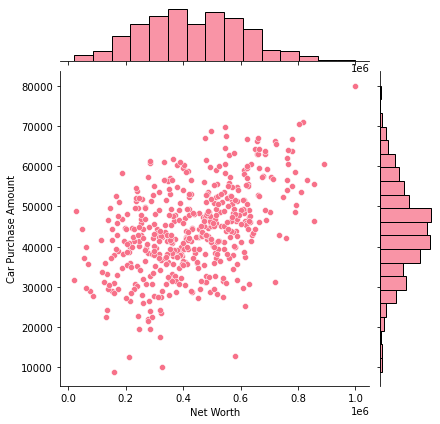

In [17]:
sns.jointplot(x='Net Worth',y='Car Purchase Amount',data=data)

In [18]:
data.nlargest(5, 'Annual Salary')

Customer Name                        Customer e-mail  \
28         Gemma Hendrix                     lobortis@non.co.uk   
342  Flores, Caldwell U.                  ut@Etiamvestibulum.ca   
465              Vaughan                   Aliquam@aaliquet.com   
370   Daugherty, Veda M.  venenatis.vel.faucibus@iaculisnec.net   
96         Glenna Graham          sodales@maurisSuspendisse.com   

            Country  Gender        Age  Annual Salary  Credit Card Debt  \
28          Denmark     1.0  46.124036   100000.00000      17452.921790   
342  Western Sahara     0.0  40.752195    92471.17612       5404.397644   
465         Ukraine     0.0  51.441981    92455.72807       9877.169366   
370          Guinea     1.0  48.308673    91083.73918      13148.855970   
96          Bolivia     0.0  46.245735    90556.62686               NaN   

       Net Worth  Car Purchase Amount  
28   188032.0778          58350.31809  
342  515717.7476          59096.26978  
465  285326.3544          61404.22578  
370  387538.2487          60960.83428  
96   479586.9387          61593.52058

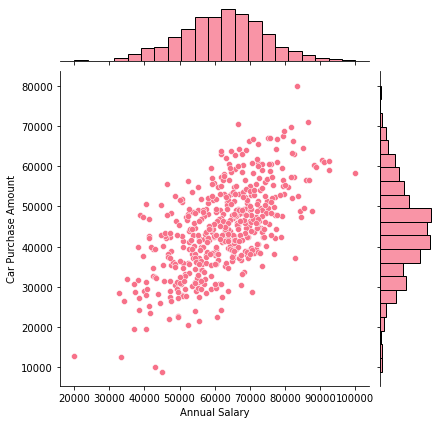

In [19]:
sns.jointplot(x='Annual Salary',y='Car Purchase Amount',data=data)

In [20]:
data.nlargest(5, 'Credit Card Debt')

Customer Name                           Customer e-mail  \
221         Laurel H. Snow     dui.Suspendisse.ac@tacitisociosqu.org   
440                    Ora  bibendum.Donec.felis@liberoestcongue.org   
253  Shaeleigh M. Mckenzie        diam.lorem.auctor@estmollisnon.net   
130           Oren Rosario  ultrices.Vivamus.rhoncus@lacusMauris.net   
404               Benjamin    nisi.Mauris.nulla@vitaeodiosagittis.ca   

              Country  Gender        Age  Annual Salary  Credit Card Debt  \
221           Andorra     1.0  36.408033    69494.69783       20000.00000   
440           Uruguay     1.0  39.665657    57777.15558       19692.91262   
253  Christmas Island     1.0  46.205241    55434.04046       18693.14652   
130          Slovenia     NaN  53.380955    69255.98753       18361.24915   
404     Faroe Islands     0.0  61.224725    61639.76386       17870.63765   

       Net Worth  Car Purchase Amount  
221  335809.6171          37303.56701  
440  601210.2803          41147.46679  
253  316906.6441          37093.92033  
130  339207.2774          51551.67997  
404  684209.5510          63868.94051

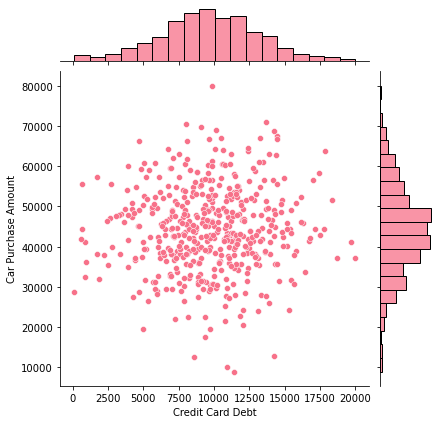

In [21]:
sns.jointplot(x='Credit Card Debt',y='Car Purchase Amount',data=data)

In [22]:
data.nlargest(5, 'Age')

Customer Name                        Customer e-mail      Country  \
194         Gil Sanders               eu.ultrices@cursuset.net        Haiti   
236      Tate C. Foster          dignissim.magna@Maurisvel.edu     Viet Nam   
246     Kylee O. Warner                  cursus.in@neque.co.uk        China   
290  Abigail X. Lindsey                          dui@nondui.ca      Croatia   
303  Chambers, Avram C.  Nunc.pulvinar.arcu@ultricesaauctor.ca  Isle of Man   

     Gender        Age  Annual Salary  Credit Card Debt    Net Worth  \
194     0.0  70.000000    52323.24480      12438.856480  346555.1716   
236     1.0  69.569306    41434.51258       6810.555606  252220.2937   
246     1.0  65.224881    70703.85013       5025.365518  284991.7415   
290     0.0  63.414531    46549.16329        640.045378  626163.8320   
303     1.0  62.868861    75719.22986      10515.281350  474485.6659   

     Car Purchase Amount  
194          56229.41270  
236          47009.57741  
246          60763.24731  
290          55543.38497  
303          67092.23276

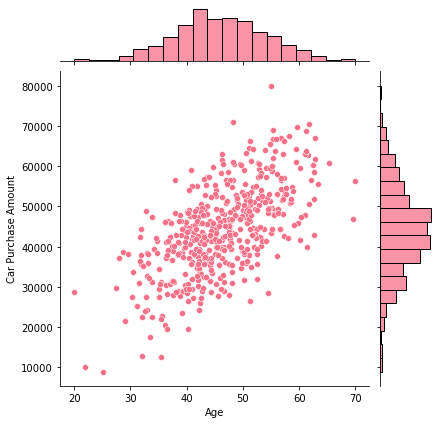

In [23]:
sns.jointplot(x='Age',y='Car Purchase Amount',data=data)

In [24]:
def checkDataForNulls (data):
    percent_missing = data.isnull().sum() * 100 / len(data)
    missing_value_df = pd.DataFrame({'Column': data.columns,
                                 'percent_missing': percent_missing})
    print(missing_value_df)

In [25]:
checkDataForNulls(data)

                                  Column  percent_missing
Customer Name              Customer Name              1.6
Customer e-mail          Customer e-mail              3.0
Country                          Country              1.8
Gender                            Gender              3.6
Age                                  Age              2.6
Annual Salary              Annual Salary              2.2
Credit Card Debt        Credit Card Debt              3.6
Net Worth                      Net Worth              3.2
Car Purchase Amount  Car Purchase Amount              0.0


In [26]:
for var in data.columns:
    if data[var].isnull().sum() > 0:
        print(var, data[var].isnull().mean())

Customer Name 0.016
Customer e-mail 0.03
Country 0.018
Gender 0.036
Age 0.026
Annual Salary 0.022
Credit Card Debt 0.036
Net Worth 0.032


In [27]:
data.isnull().sum()

Customer Name           8
Customer e-mail        15
Country                 9
Gender                 18
Age                    13
Annual Salary          11
Credit Card Debt       18
Net Worth              16
Car Purchase Amount     0
dtype: int64

In [28]:
for col in data.columns:
    print(col, ': ', len(data[col].unique()), 'labels')

Customer Name :  491 labels
Customer e-mail :  486 labels
Country :  212 labels
Gender :  3 labels
Age :  488 labels
Annual Salary :  490 labels
Credit Card Debt :  483 labels
Net Worth :  485 labels
Car Purchase Amount :  500 labels


In [29]:
data['Gender'].unique()

array([ 0.,  1., nan])

In [30]:
data['Customer Name'].unique()

array(['Martina Avila', 'Harlan Barnes', 'Naomi Rodriquez',
       'Jade Cunningham', 'Cedric Leach', 'Carla Hester',
       'Griffin Rivera', 'Orli Casey', 'Marny Obrien', 'Rhonda Chavez',
       'Jerome Rowe', 'Akeem Gibson', 'Quin Smith', 'Tatum Moon',
       'Sharon Sharpe', 'Thomas Williams', nan, 'Stephen Lindsey',
       'Sloane Mann', 'Athena Wolf', 'Blythe Romero', 'Zelenia Byers',
       'Nola Wiggins', 'Micah Wheeler', 'Hedda Miranda', 'Ulric Lynn',
       'Alma Pope', 'Gemma Hendrix', 'Castor Wood', 'Herman Stevenson',
       'Adrienne Bolton', 'Dahlia Cleveland', 'Keane Browning',
       'Quon Hull', 'Coby Charles', 'Amery Cortez', 'Uriel Bradshaw',
       'Fredericka Sanders', 'Christopher Stevens', 'Rachel Ashley',
       'Lael Wright', 'Ryder Shaffer', 'Eric Noel', 'Tamara Guy',
       'Quincy Bell', 'Lee Taylor', 'Kenneth Pope', 'Reese Vance',
       'Quon Carroll', 'Magee Davidson', 'Leilani Gross',
       'Morgan William', 'Francesca Cervantes', 'Rafael Peterson',
  

In [31]:
data['Customer e-mail'].unique()

array(['cubilia.Curae.Phasellus@quisaccumsanconvallis.edu',
       'eu.dolor@diam.co.uk',
       'vulputate.mauris.sagittis@ametconsectetueradipiscing.co.uk',
       'malesuada@dignissim.com',
       'felis.ullamcorper.viverra@egetmollislectus.net',
       'mi@Aliquamerat.edu', nan,
       'nunc.est.mollis@Suspendissetristiqueneque.co.uk',
       'Phasellus@sedsemegestas.org', 'nec@nuncest.com',
       'ipsum.cursus@dui.org', 'turpis.egestas.Fusce@purus.edu',
       'nulla@ipsum.edu', 'Cras.sed.leo@Seddiamlorem.ca',
       'eget.metus@aaliquetvel.co.uk', 'aliquet.molestie@ut.org',
       'ultrices.posuere.cubilia@pedenonummyut.net',
       'erat.eget.ipsum@tinciduntpede.org', 'at.augue@augue.net',
       'volutpat.Nulla.facilisis@primis.ca', 'Sed.eu@risusNuncac.co.uk',
       'Aliquam@augue.edu', 'arcu.eu@tincidunt.org',
       'condimentum.Donec@duiCum.com', 'scelerisque@magnased.com',
       'sociis@vulputateveliteu.com', 'Nunc.mauris.Morbi@turpis.org',
       'lobortis@non.co.uk', '

In [32]:
data['Country'].unique()

array(['Bulgaria', 'Belize', 'Algeria', 'Cook Islands', 'Brazil',
       'Liberia', 'Syria', 'Czech Republic', 'Armenia', 'Somalia',
       'Sint Maarten', 'Greenland', 'Nicaragua', 'Palestine, State of',
       'United Arab Emirates', 'Gabon', 'Tokelau', 'Portugal', 'Chad',
       'Iraq', 'Sudan', 'Angola', 'Nigeria', 'Madagascar', nan, 'Oman',
       'Colombia', 'Namibia', 'Denmark', 'Dominican Republic',
       'Costa Rica', 'Botswana', 'Saint Pierre and Miquelon', 'France',
       'Senegal', 'Cambodia', 'Suriname', 'Turkey', 'Ethiopia',
       'French Guiana', 'Bhutan', 'Georgia', 'Mozambique', 'Nauru',
       'Timor-Leste', 'Djibouti', 'Argentina', 'Taiwan', 'Åland Islands',
       'Turks and Caicos Islands', 'Samoa', 'Vanuatu', 'Mongolia',
       'Sri Lanka', 'Guinea-Bissau', 'Egypt', 'Slovenia', 'Benin',
       'Cape Verde', 'Paraguay', 'Laos', 'Iceland', 'Viet Nam',
       'Marshall Islands', 'Germany', 'Kyrgyzstan', 'Mauritius', 'Gambia',
       'Reunion', 'Jordan', 'Slovakia'

# Step 4: Explore & Visualisation of the Dataset

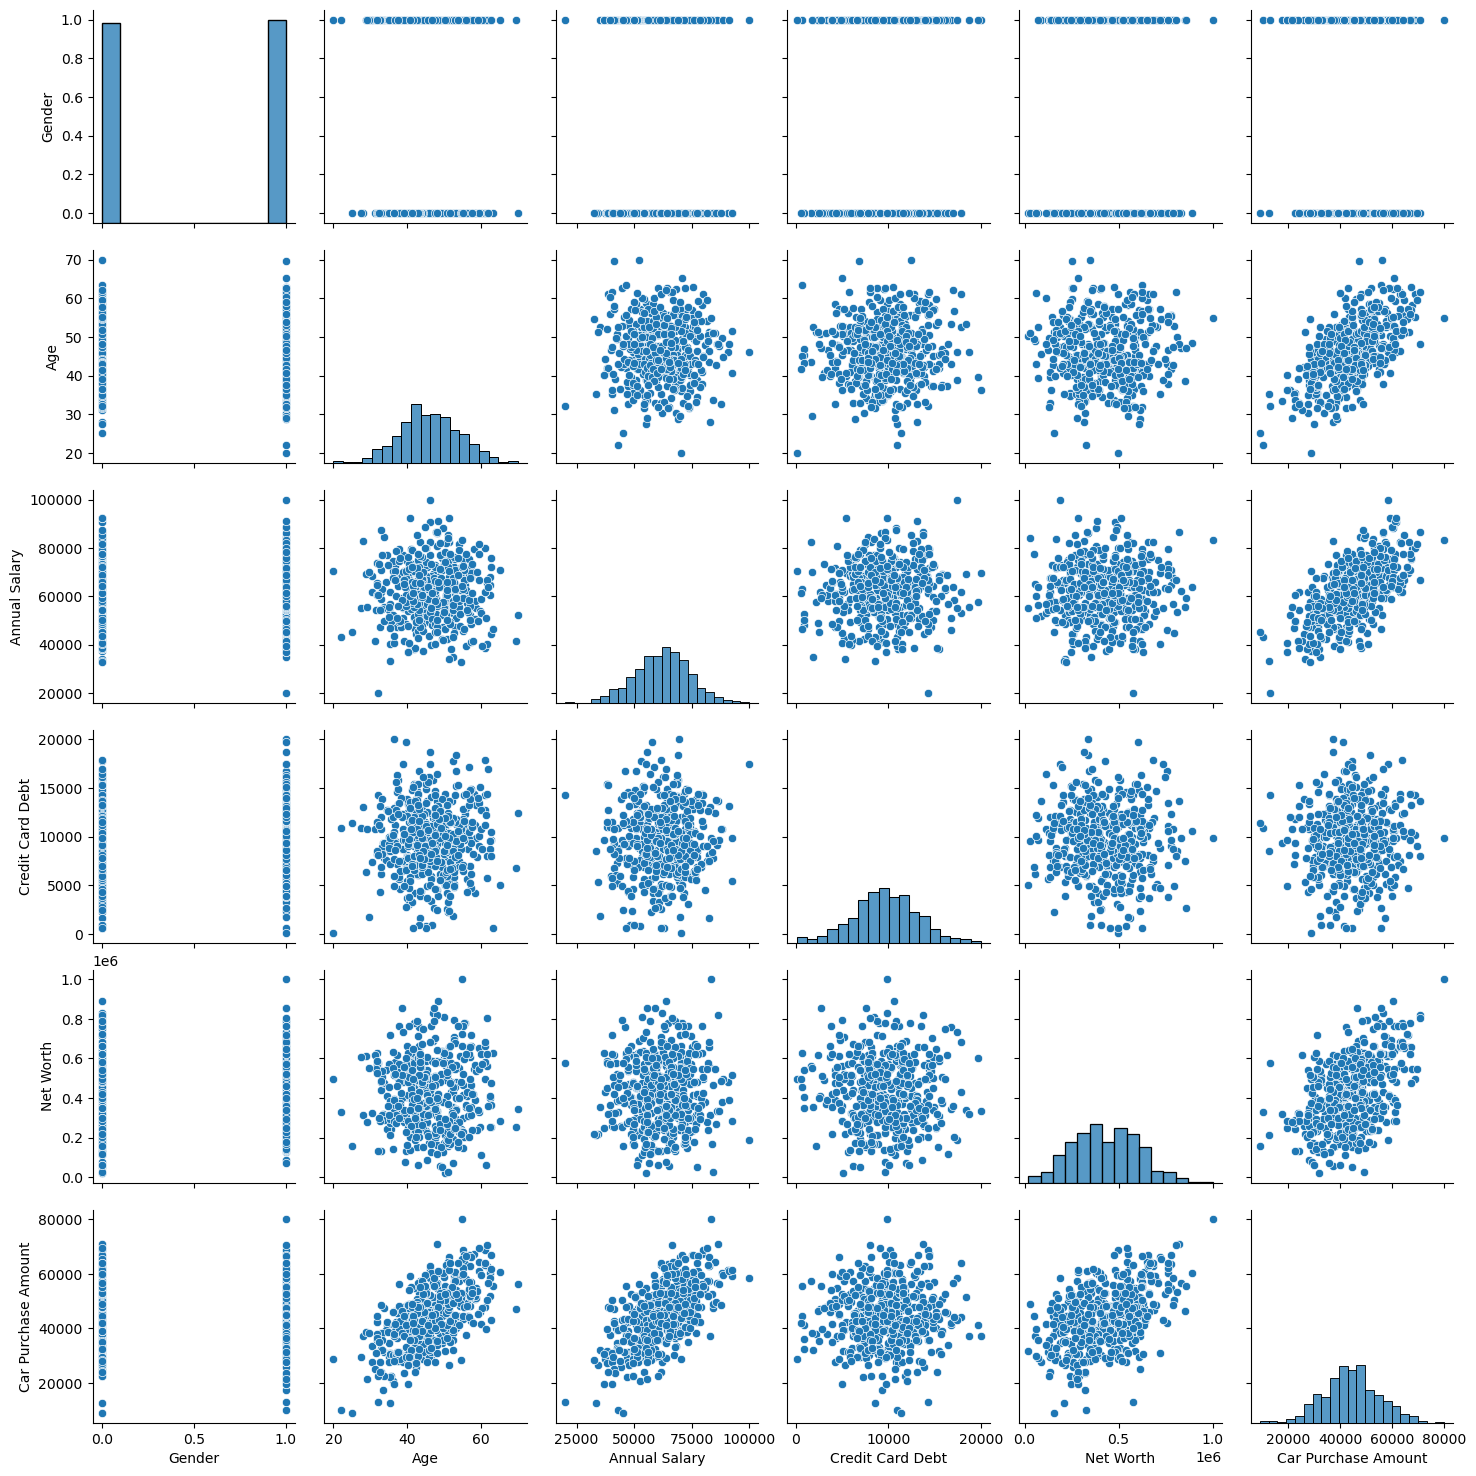

In [33]:
plt.style.use("default")
sns.pairplot(data)

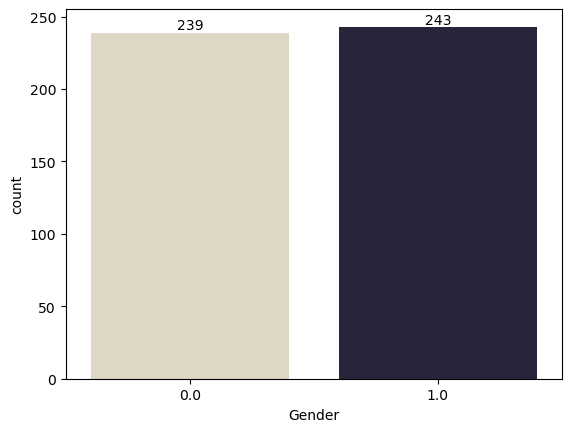

In [34]:
ax = sns.countplot(data=data,x='Gender', palette = "ch:s=-.2,r=.6")
for container in ax.containers:
        ax.bar_label(container)
        
plt.savefig('gen.png', bbox_inches = 'tight', dpi=400)

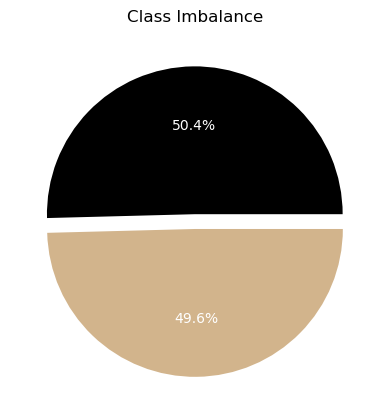

In [35]:
colors = ['black', 'tan']

plt.pie(data['Gender'].value_counts(),autopct='%.1f%%', labels = data['Gender'].value_counts().index,explode=[0,0.1], colors=colors, textprops = (dict(color="w")))
plt.title("Class Imbalance")
plt.show()

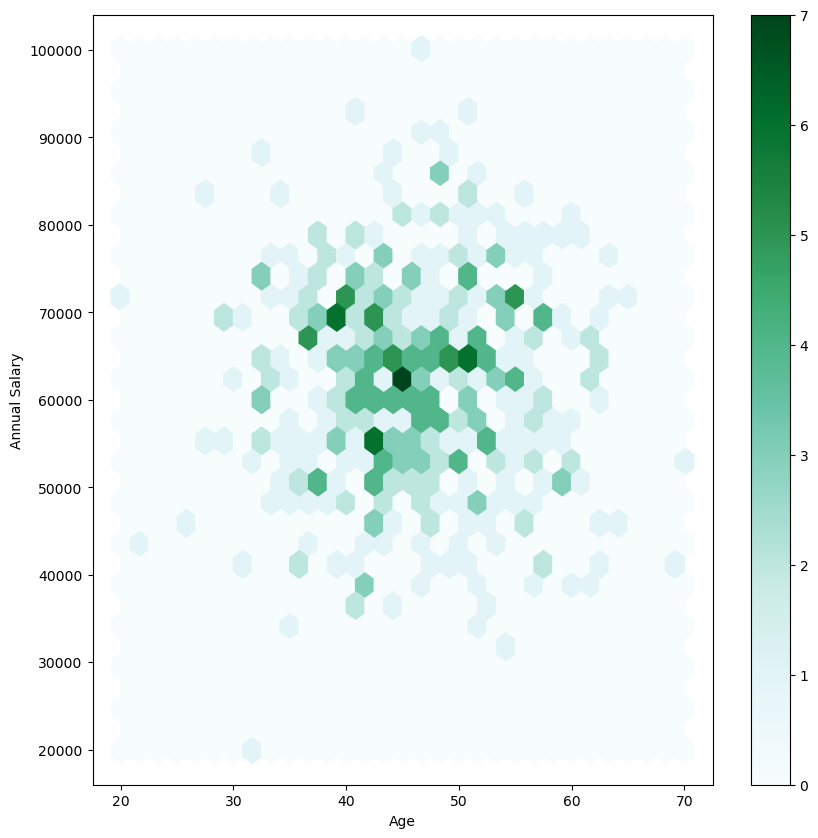

In [36]:
data.plot.hexbin(x='Age', y='Annual Salary', gridsize=30, sharex=False, figsize=(10,10))
plt.xlabel('Age')
plt.ylabel('Annual Salary')
plt.show()

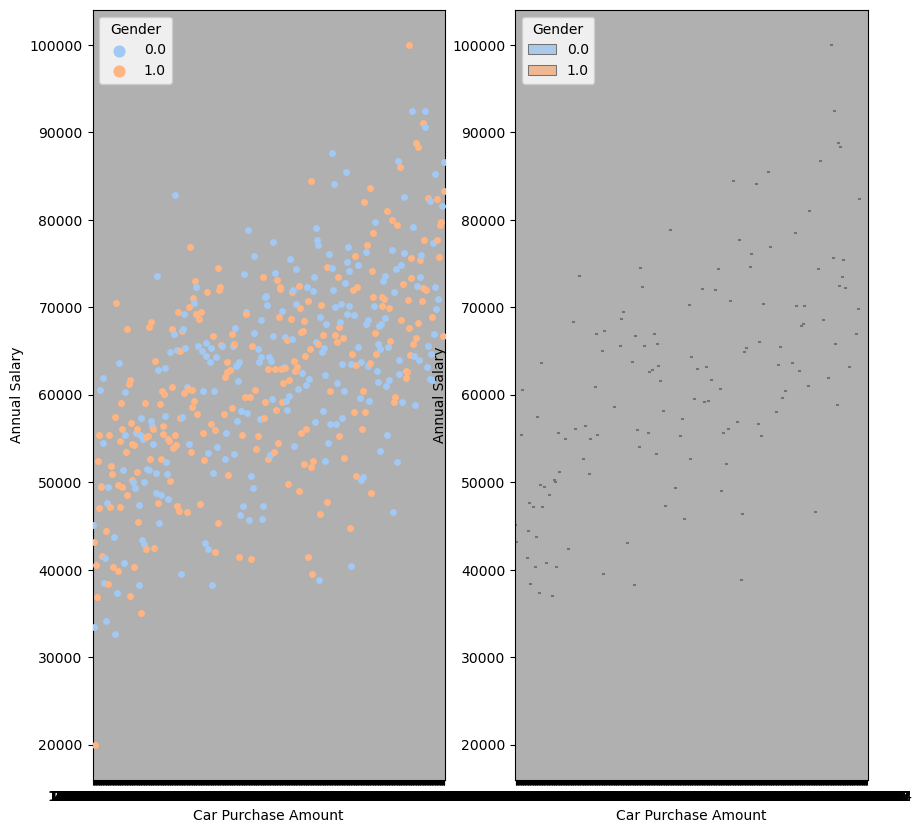

In [37]:
fig, ax = plt.subplots(1, 2, figsize=(10, 10))
sns.swarmplot(x = 'Car Purchase Amount', y='Annual Salary', hue='Gender', data=data, size=5, palette='pastel', ax=ax[0])
sns.violinplot(x = 'Car Purchase Amount', y='Annual Salary', hue='Gender', data=data, palette='pastel', ax=ax[1])

ax[0].grid()
ax[1].grid()

fig.savefig('3.png')

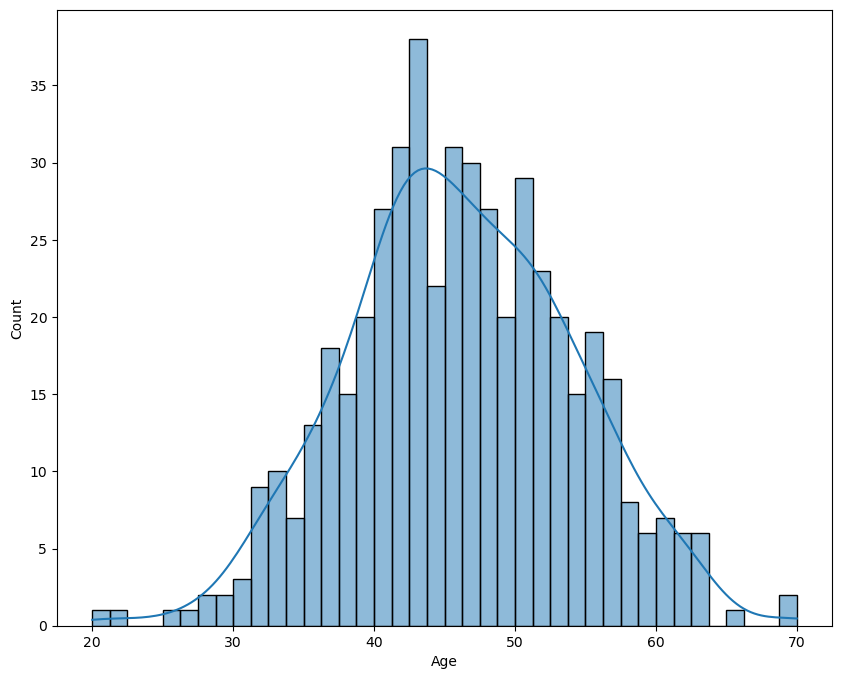

In [38]:
plt.figure(figsize = (10,8))
sns.histplot(data['Age'], kde = True, bins = 40)
plt.show()

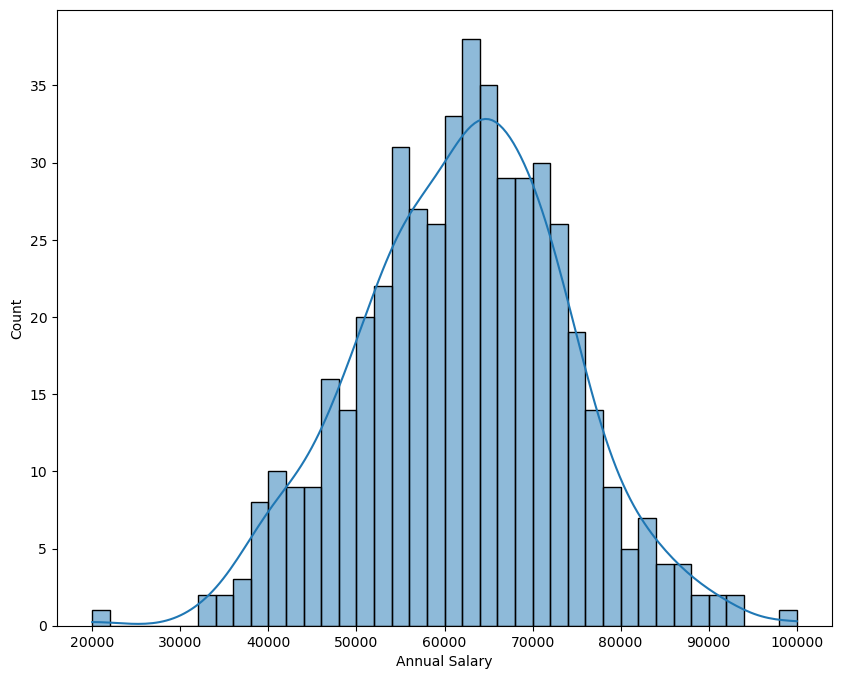

In [39]:
plt.figure(figsize = (10,8))
sns.histplot(data['Annual Salary'], kde = True, bins = 40)
plt.show()

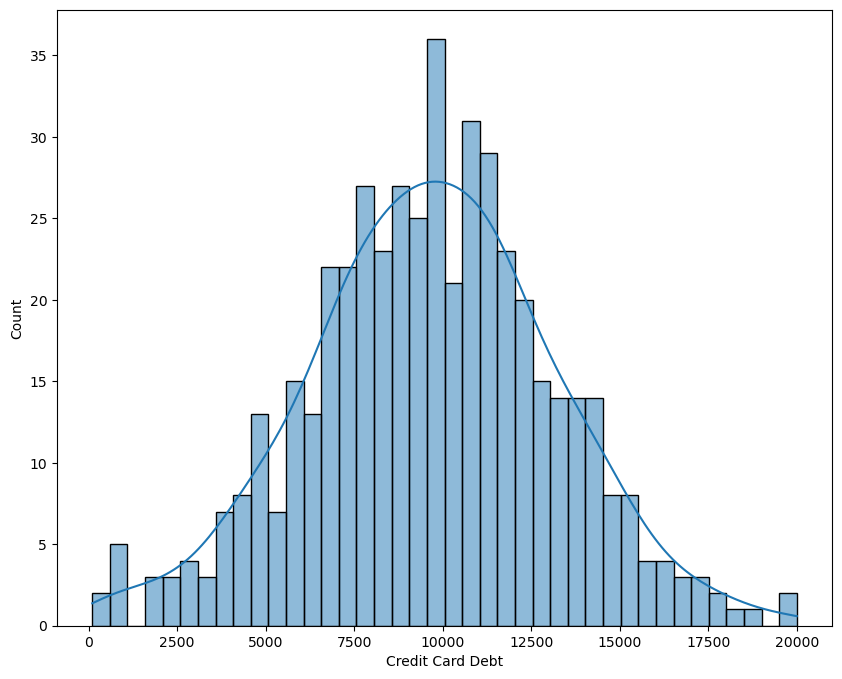

In [40]:
plt.figure(figsize = (10,8))
sns.histplot(data['Credit Card Debt'], kde = True, bins = 40)
plt.show()

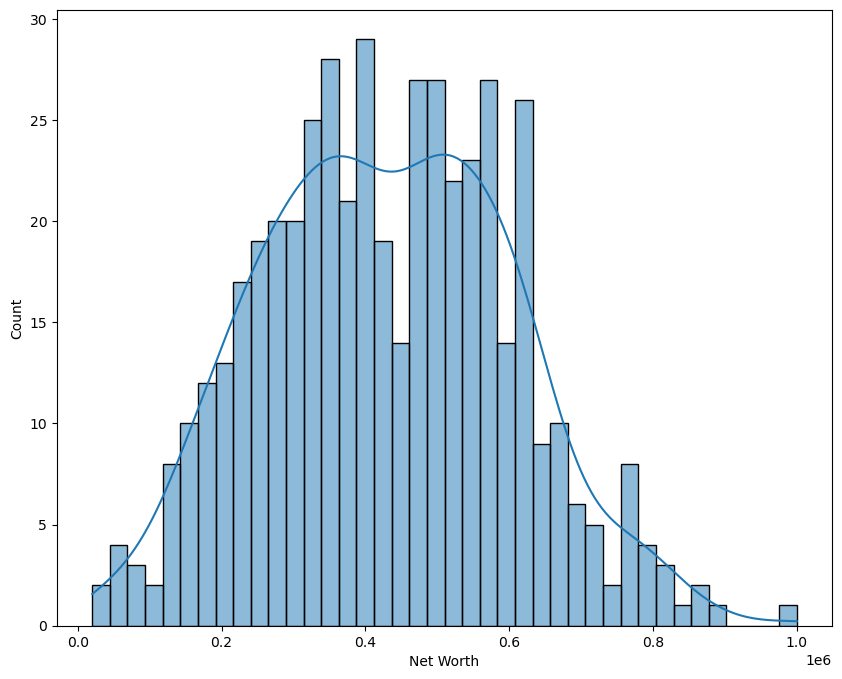

In [41]:
plt.figure(figsize = (10,8))
sns.histplot(data['Net Worth'], kde = True, bins = 40)
plt.show()

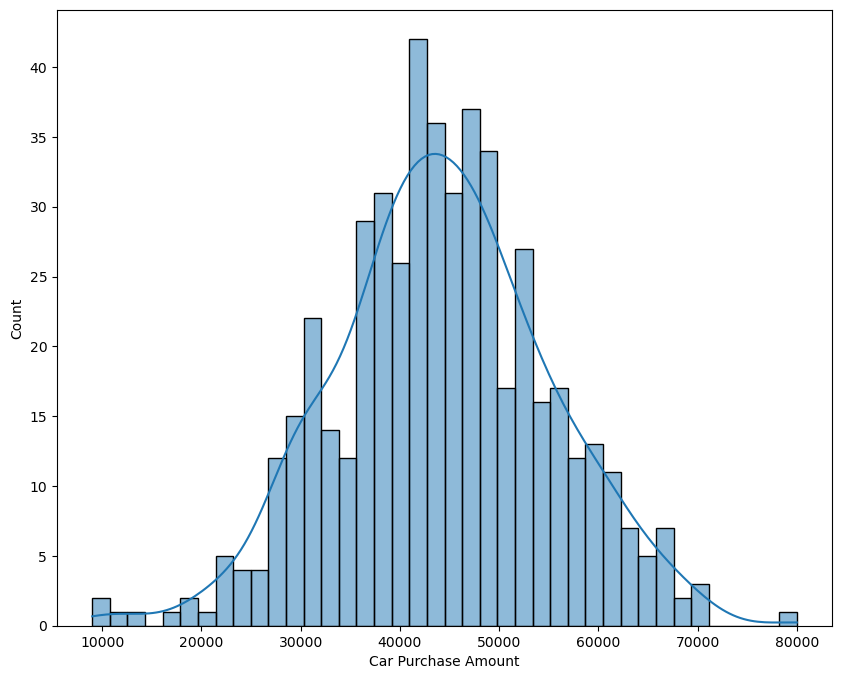

In [42]:
plt.figure(figsize = (10,8))
sns.histplot(data['Car Purchase Amount'], kde = True, bins = 40)
plt.show()

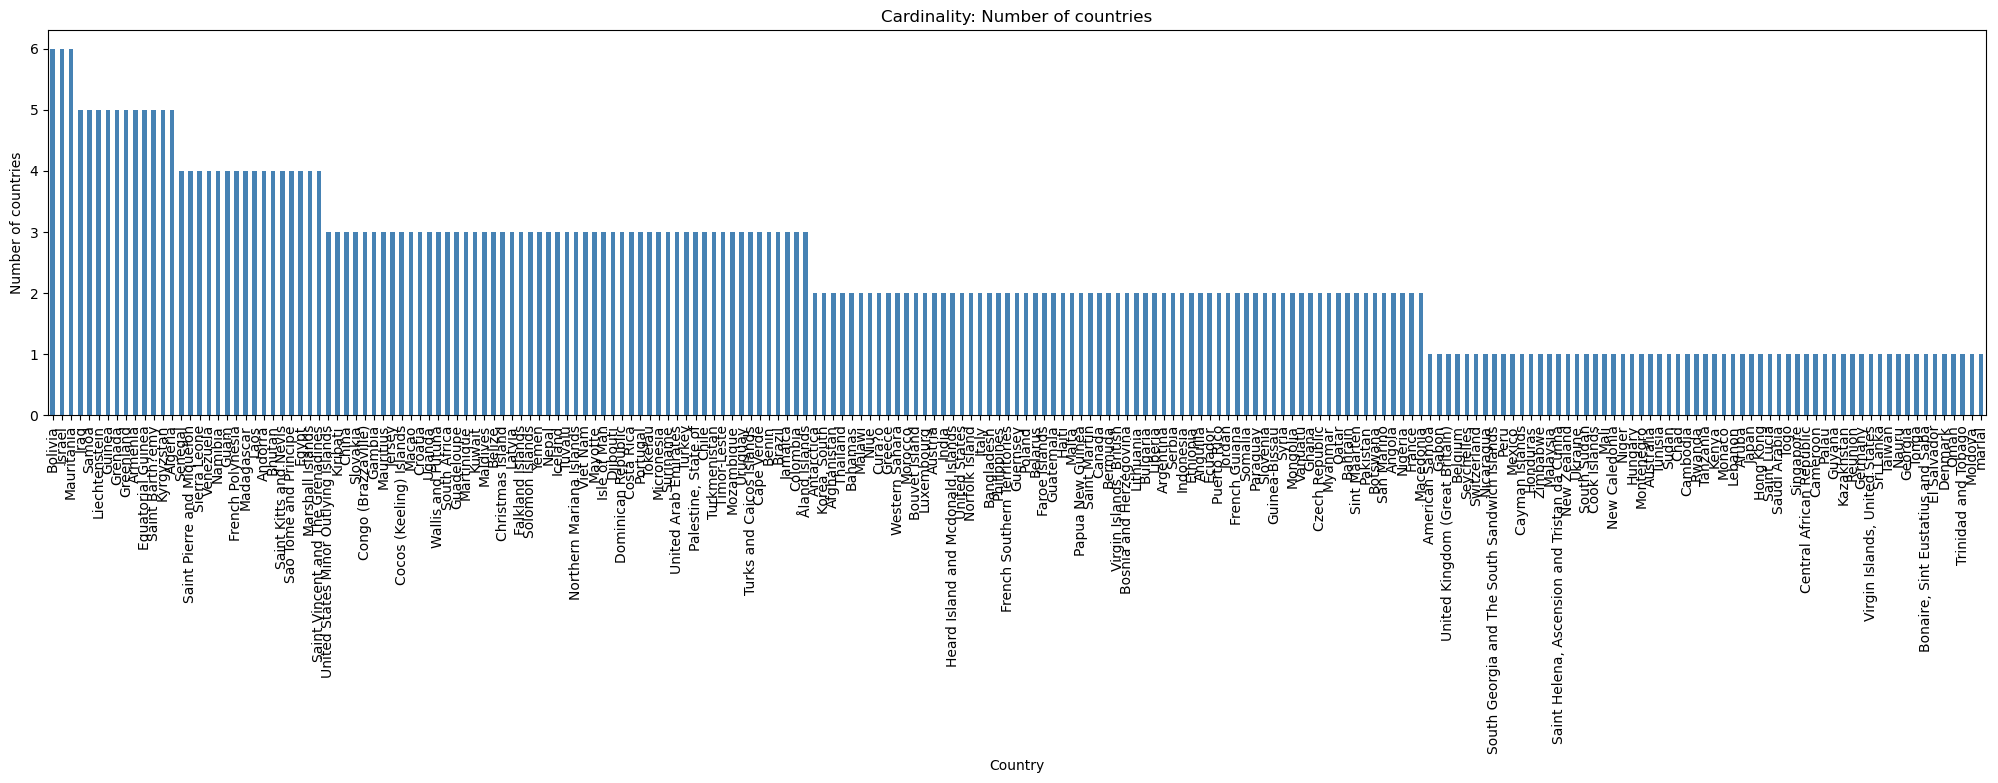

In [43]:
data.Country.value_counts().plot.bar(figsize = (25, 5), color = 'steelblue')
plt.title('Cardinality: Number of countries')
plt.xlabel('Country')
plt.ylabel('Number of countries')
plt.show()


<AxesSubplot:xlabel='Annual Salary', ylabel='Count'>

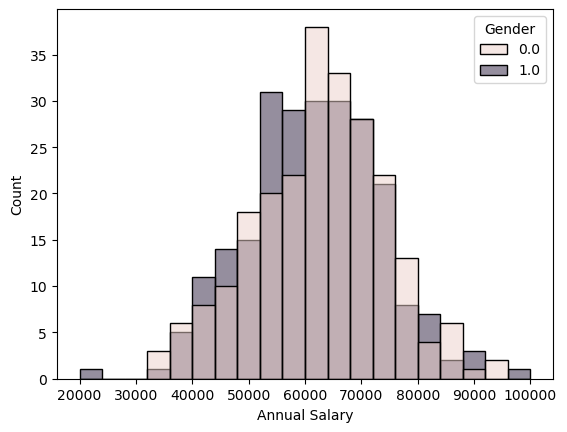

In [44]:
sns.histplot(x='Annual Salary', data=data, hue='Gender', bins=20)

<AxesSubplot:xlabel='Credit Card Debt', ylabel='Count'>

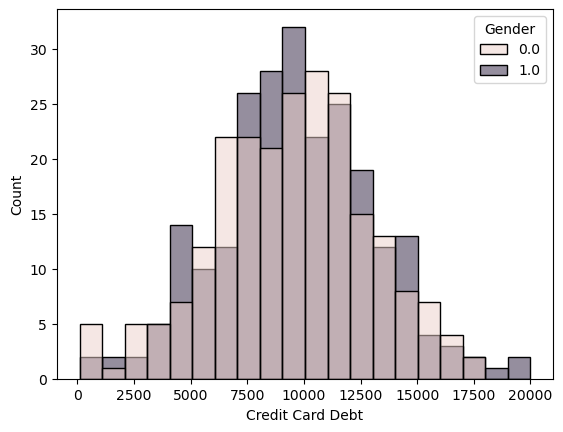

In [45]:
sns.histplot(x='Credit Card Debt', data=data, hue='Gender', bins=20)

<AxesSubplot:xlabel='Car Purchase Amount', ylabel='Count'>

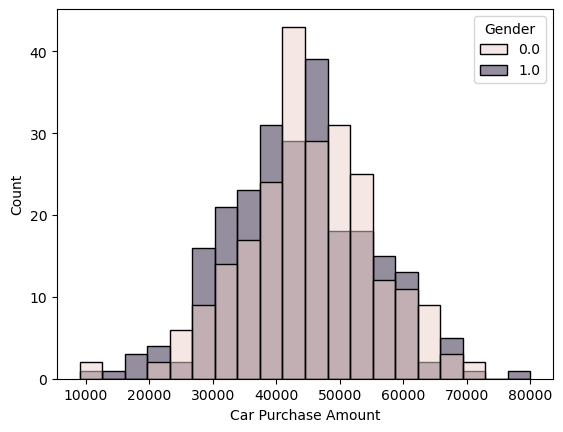

In [46]:
sns.histplot(x='Car Purchase Amount', data=data, hue='Gender', bins=20) 

<AxesSubplot:xlabel='Net Worth', ylabel='Count'>

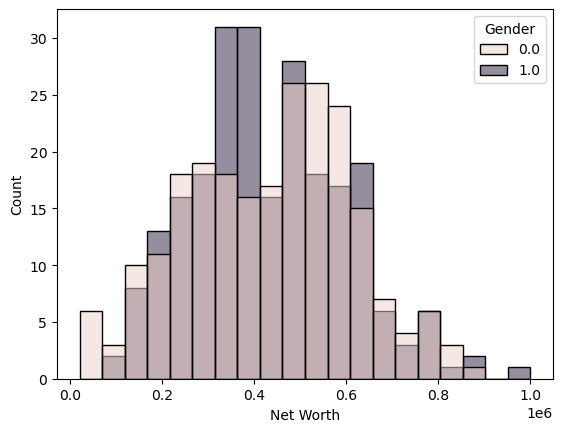

In [47]:
sns.histplot(x='Net Worth', data=data, hue='Gender', bins=20)

In [48]:
fig = px.density_contour(data, x='Age', y='Annual Salary')
fig.show()

In [49]:
fig = px.density_contour(data, x='Gender', y='Annual Salary')
fig.show()

In [50]:
fig = px.scatter(data, x='Age', y='Annual Salary',color='Car Purchase Amount')
fig.show()

Text(0.5, 0.98, 'Visualizing Continuous Columns')

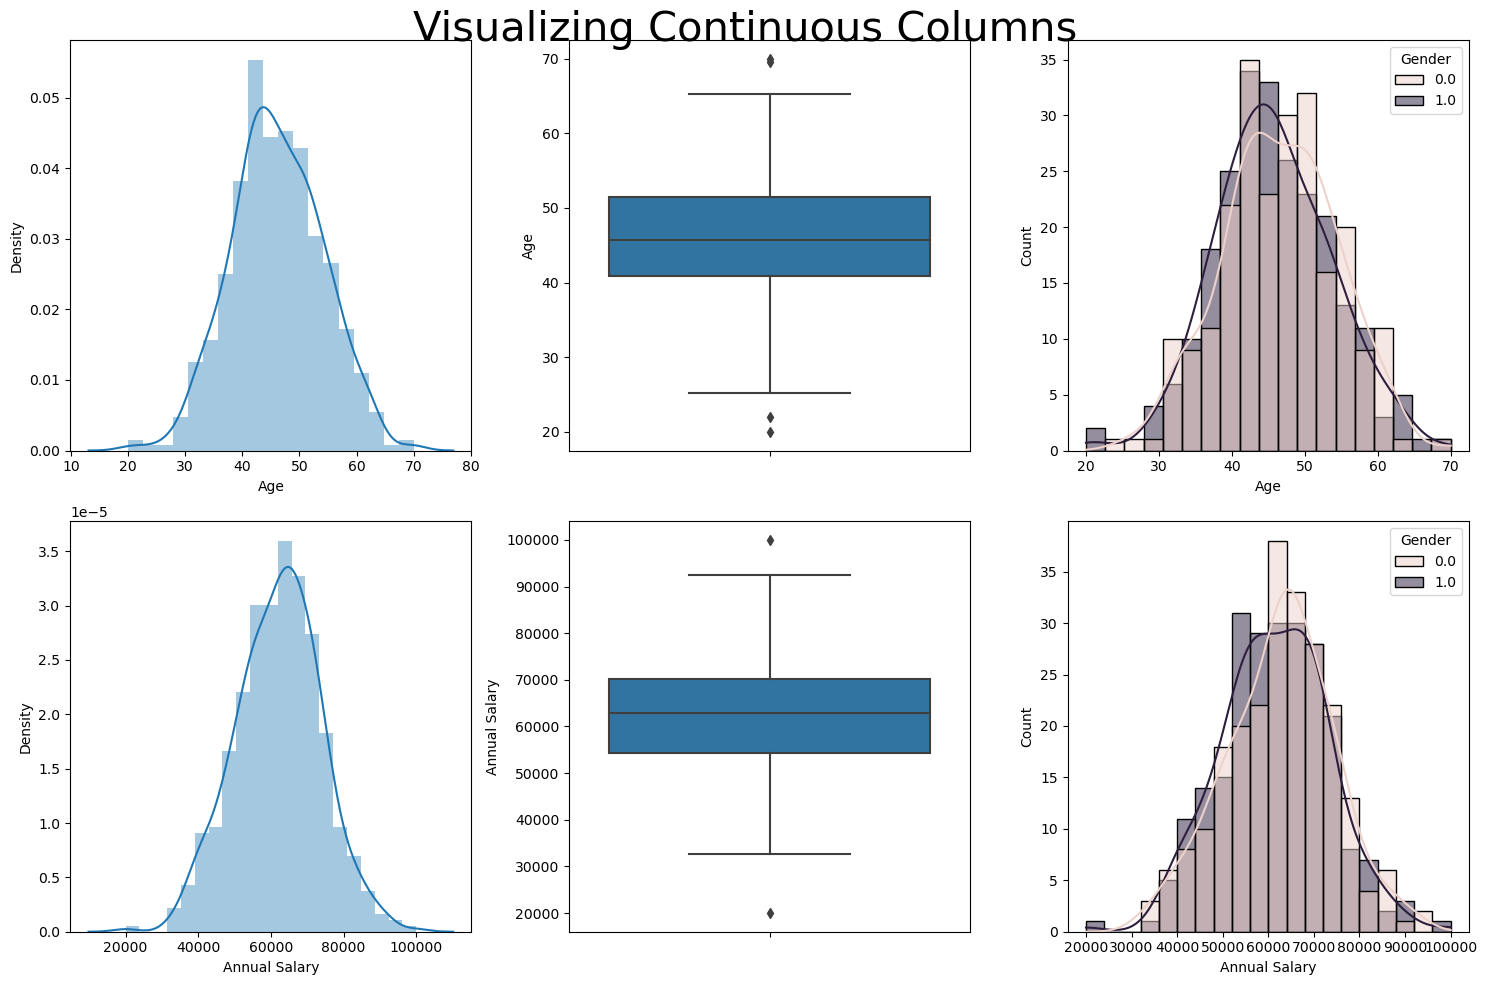

In [51]:
fig,ax=plt.subplots(2,3,figsize=(15,10))
sns.distplot(data['Age'],ax=ax[0,0])
sns.boxplot(y=data['Age'],ax=ax[0,1])
sns.histplot(data=data,x='Age',ax=ax[0,2],hue='Gender',kde=True)

sns.distplot(data['Annual Salary'],ax=ax[1,0])
sns.boxplot(y=data['Annual Salary'],ax=ax[1,1])
sns.histplot(data=data,x='Annual Salary',ax=ax[1,2],hue='Gender',kde=True)
    
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.suptitle("Visualizing Continuous Columns",fontsize=30)

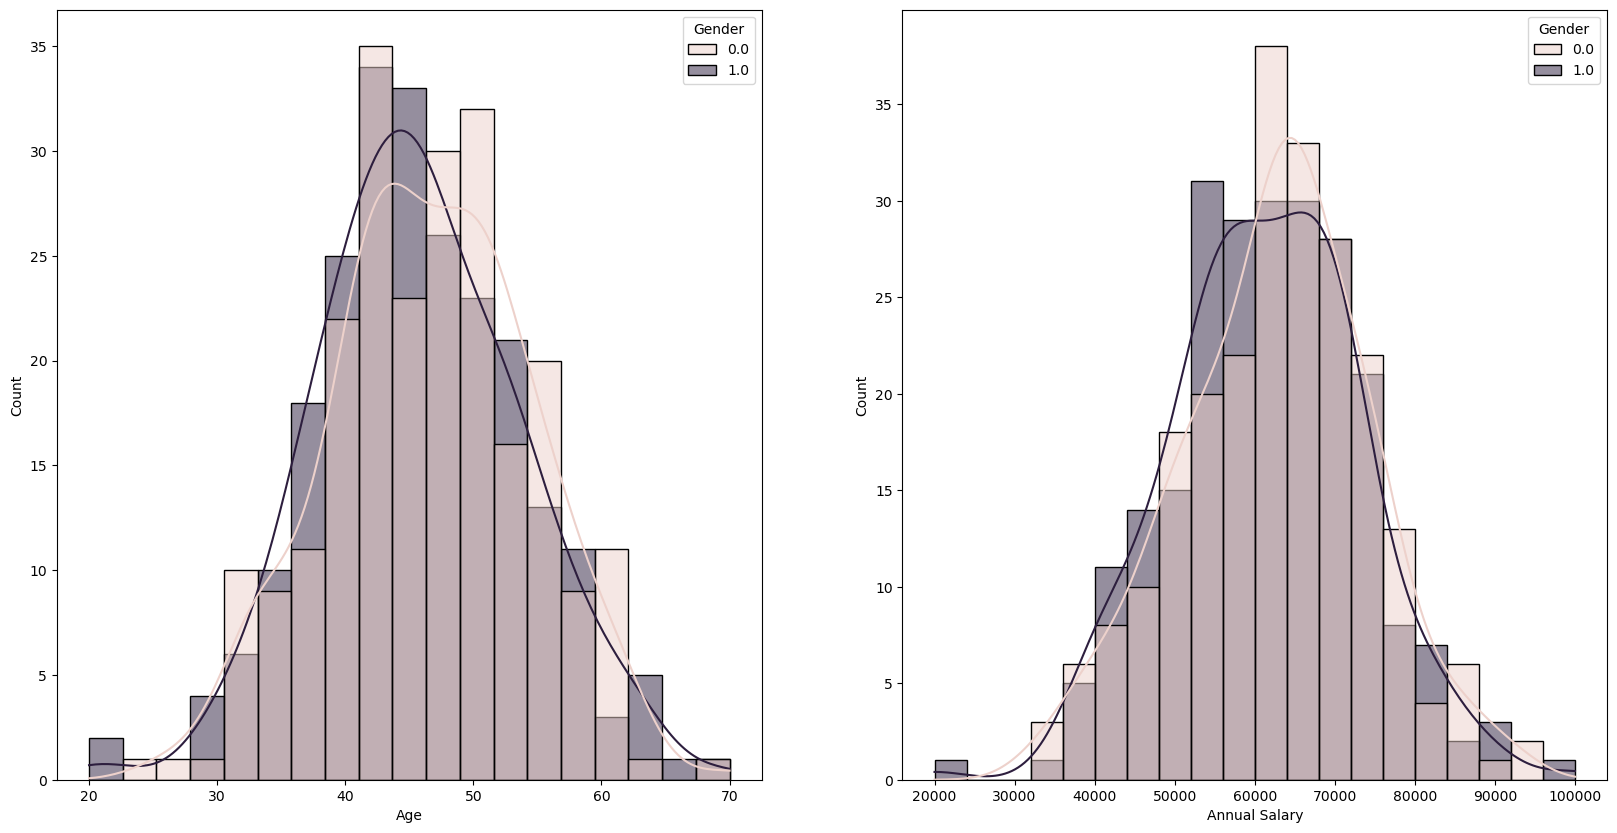

In [52]:
fig,ax=plt.subplots(1,2,figsize=(20,10))
sns.histplot(data=data,x='Age',ax=ax[0],hue='Gender',kde=True)
sns.histplot(data=data,x='Annual Salary',ax=ax[1],hue='Gender',kde=True)

plt.show()

<AxesSubplot:>

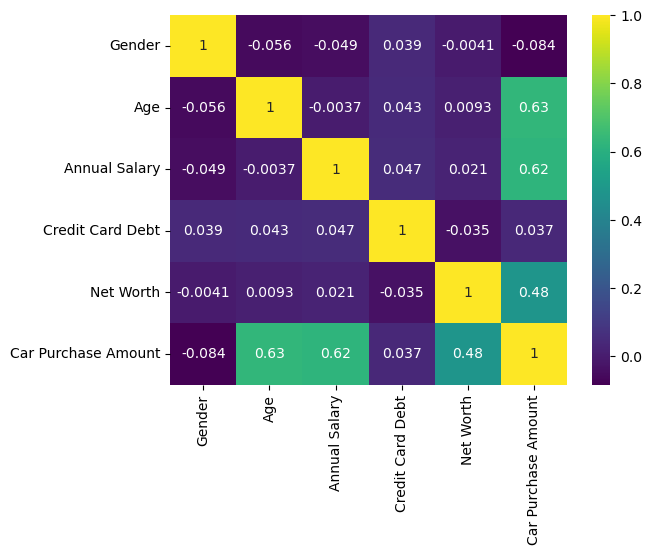

In [53]:
sns.heatmap(data.corr(), annot=True, cmap='viridis')

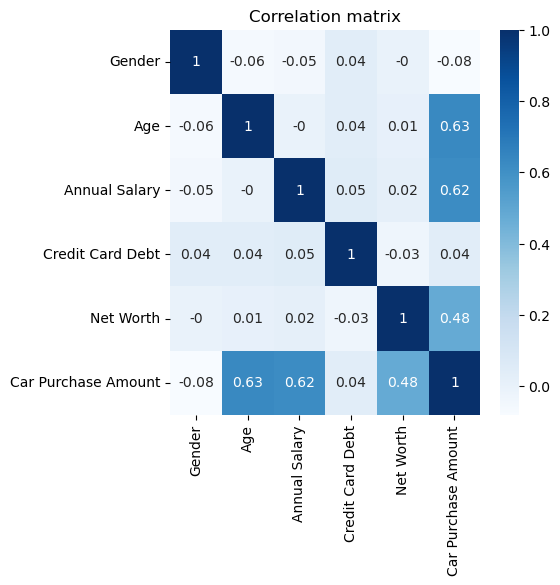

In [54]:
corr = data.corr().round(2)
fig = plt.figure(figsize=(5, 5))
sns.heatmap(corr, annot = True, cmap="Blues")
plt.title("Correlation matrix")
plt.show()


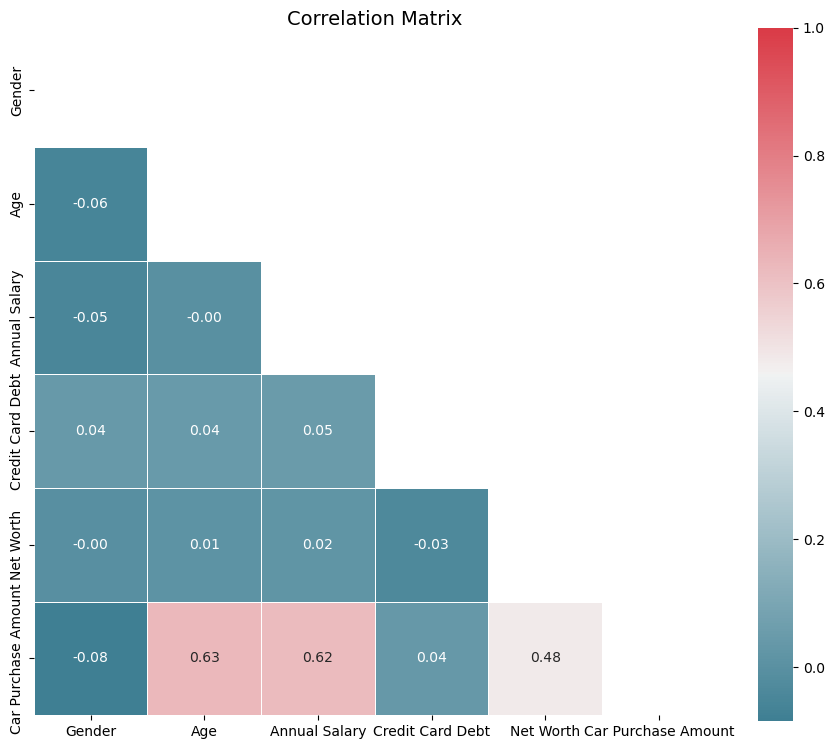

In [55]:
corrmat(data.corr(), inflate=False)
plt.show()

In [56]:
def diagnostic_plots(df, variable):
    plt.figure(figsize = (15, 6))
    plt.subplot(1, 3, 1)
    df[variable].hist()
    
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist = 'norm', plot = plt)
    
    plt.subplot(1, 3, 3)
    sns.boxplot(y = df[variable])
    plt.title("Boxplot")
    
    plt.show()

Text(0.5, 0.98, 'Visualizing Continuous Columns')

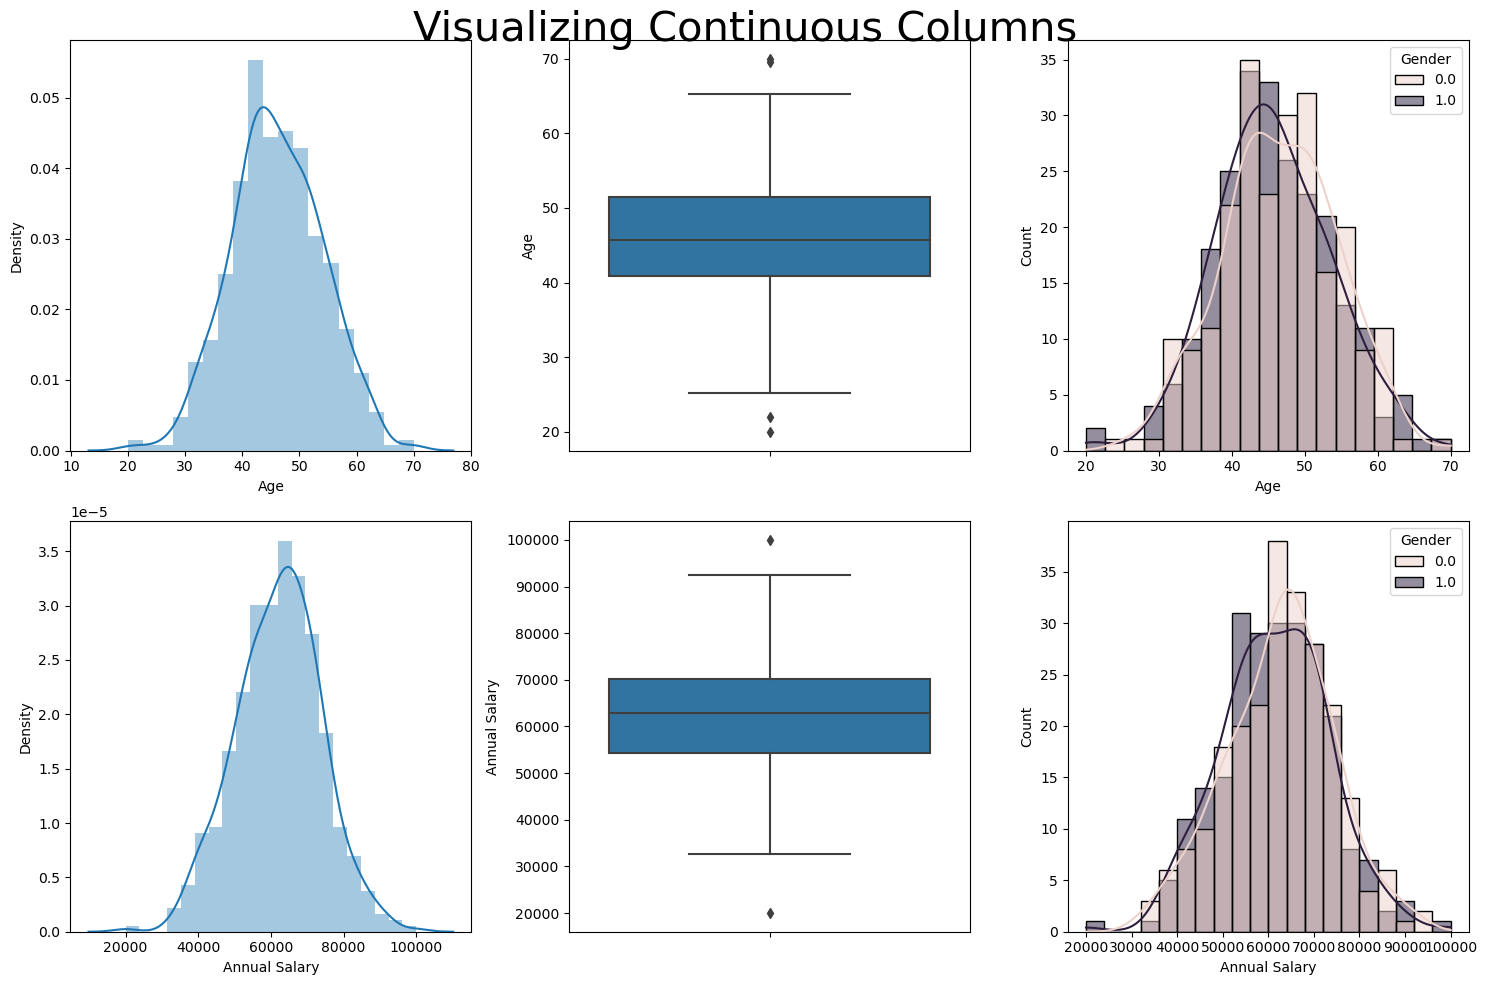

In [57]:
fig,ax=plt.subplots(2,3,figsize=(15,10))
sns.distplot(data['Age'],ax=ax[0,0])
sns.boxplot(y=data['Age'],ax=ax[0,1])
sns.histplot(data=data,x='Age',ax=ax[0,2],hue='Gender',kde=True)

sns.distplot(data['Annual Salary'],ax=ax[1,0])
sns.boxplot(y=data['Annual Salary'],ax=ax[1,1])
sns.histplot(data=data,x='Annual Salary',ax=ax[1,2],hue='Gender',kde=True)
    
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.suptitle("Visualizing Continuous Columns",fontsize=30)

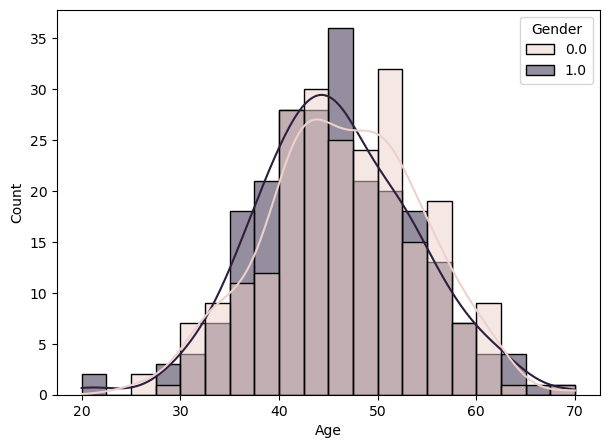

In [58]:
plt.figure(figsize=(7,5))
sns.set_palette('bright')
sns.histplot(x='Age',hue='Gender',data=data, kde=True, bins=20)
plt.show()

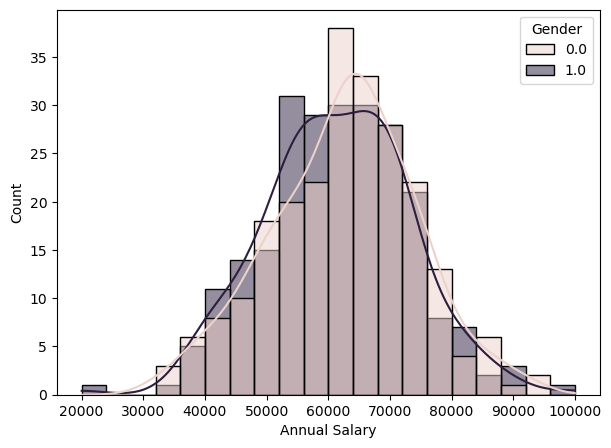

In [59]:
plt.figure(figsize=(7,5))
sns.set_palette('bright')
sns.histplot(x='Annual Salary',hue='Gender',data=data, kde=True, bins=20)
plt.show()

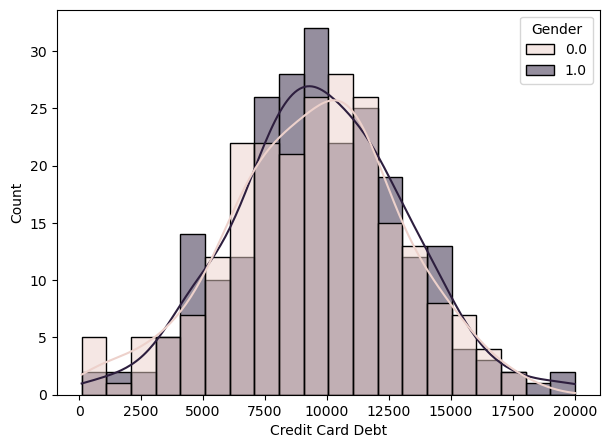

In [60]:
plt.figure(figsize=(7,5))
sns.set_palette('bright')
sns.histplot(x='Credit Card Debt',hue='Gender',data=data, kde=True, bins=20)
plt.show()

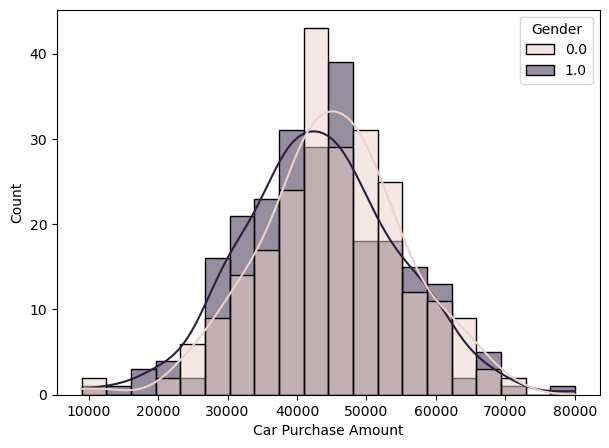

In [61]:
plt.figure(figsize=(7,5))
sns.set_palette('bright')
sns.histplot(x='Car Purchase Amount',hue='Gender',data=data, kde=True, bins=20)
plt.show()

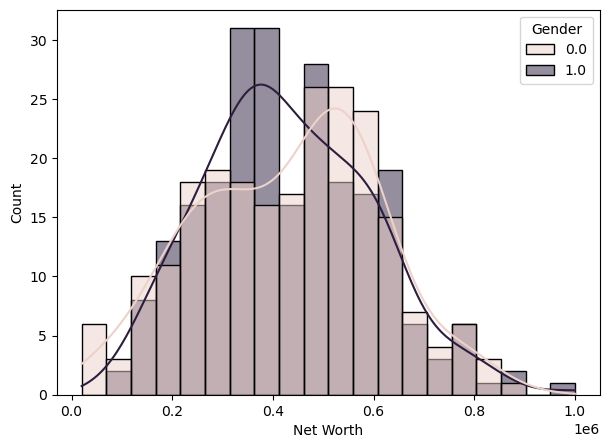

In [62]:
plt.figure(figsize=(7,5))
sns.set_palette('bright')
sns.histplot(x='Net Worth',hue='Gender',data=data, kde=True, bins=20)
plt.show()

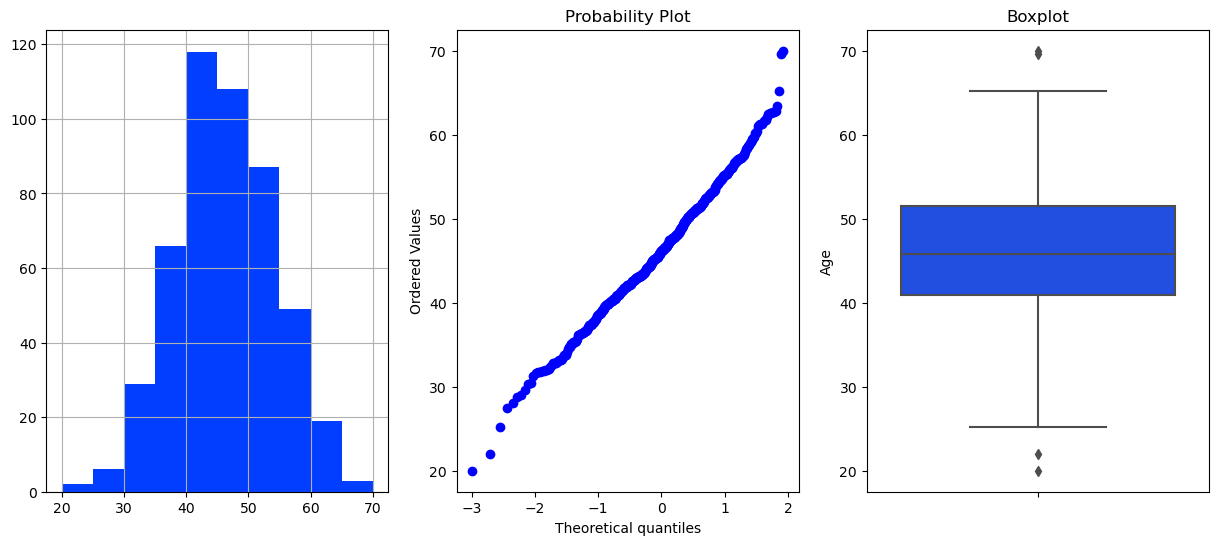

In [63]:
diagnostic_plots(data, 'Age')

(0.0, 83550.0)

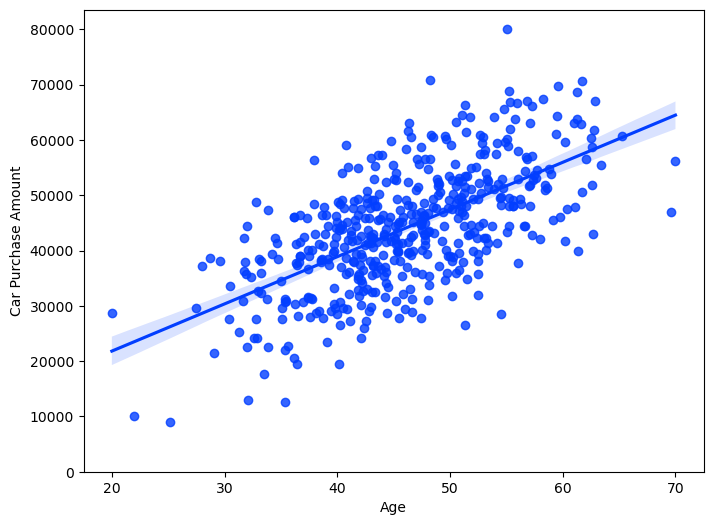

In [64]:
plt.figure(figsize=(8, 6))
sns.regplot(x='Age', y='Car Purchase Amount', data=data)
plt.ylim(0,)

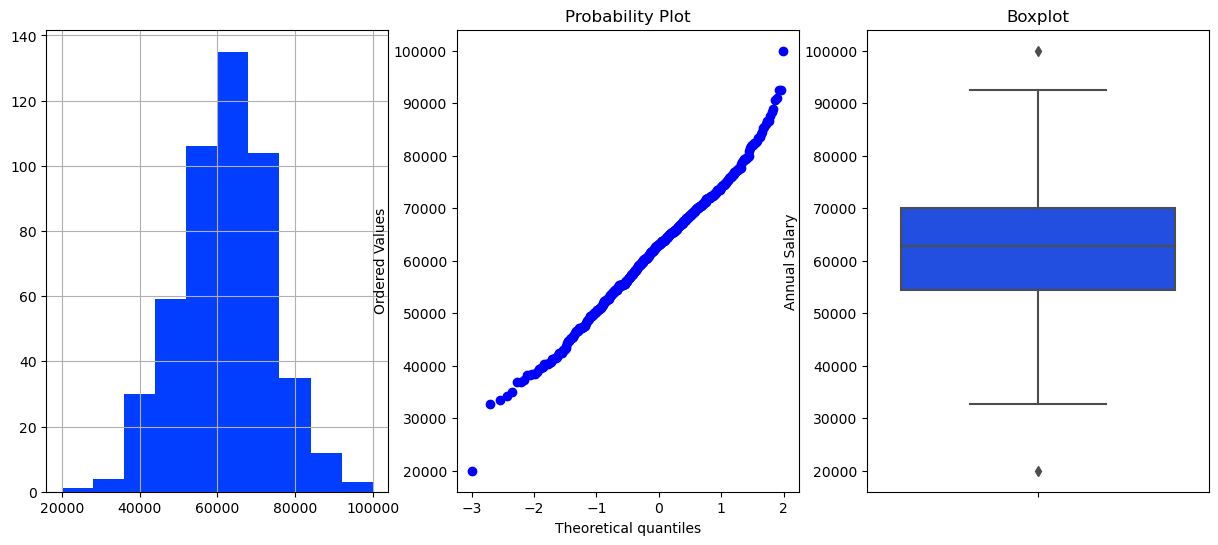

In [65]:
diagnostic_plots(data, 'Annual Salary')

(0.0, 83550.0)

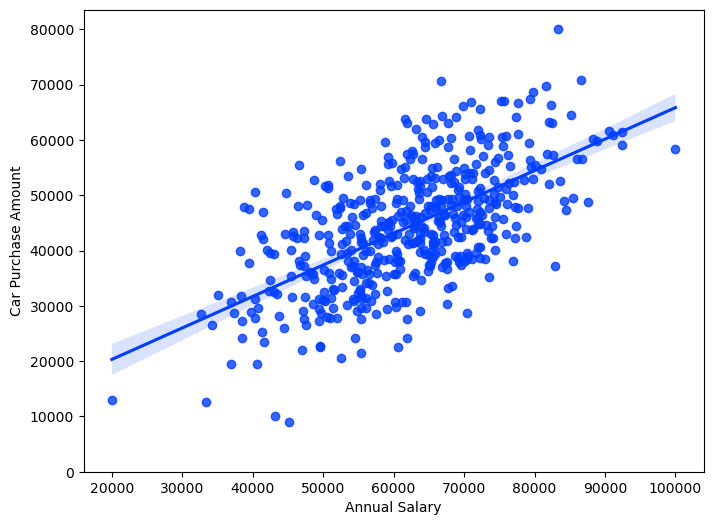

In [66]:
plt.figure(figsize=(8, 6))
sns.regplot(x='Annual Salary', y='Car Purchase Amount', data=data)
plt.ylim(0,)

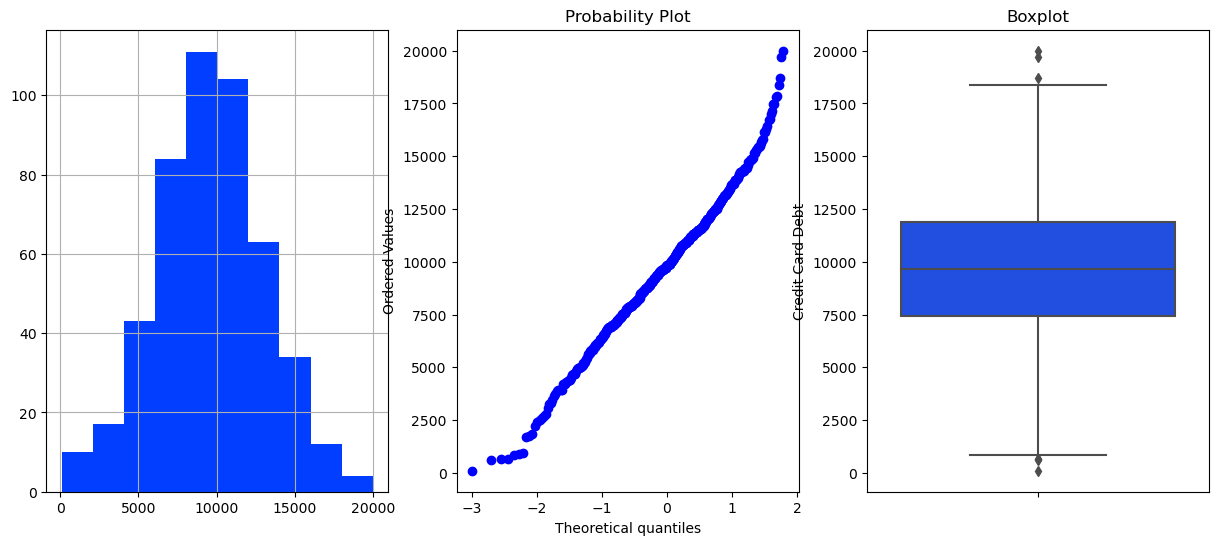

In [67]:
diagnostic_plots(data, 'Credit Card Debt')

(0.0, 83550.0)

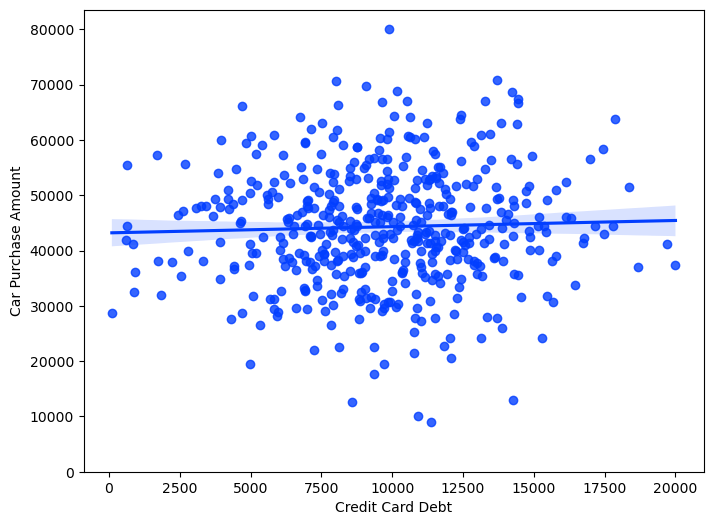

In [68]:
plt.figure(figsize=(8, 6))
sns.regplot(x='Credit Card Debt', y='Car Purchase Amount', data=data)
plt.ylim(0,)

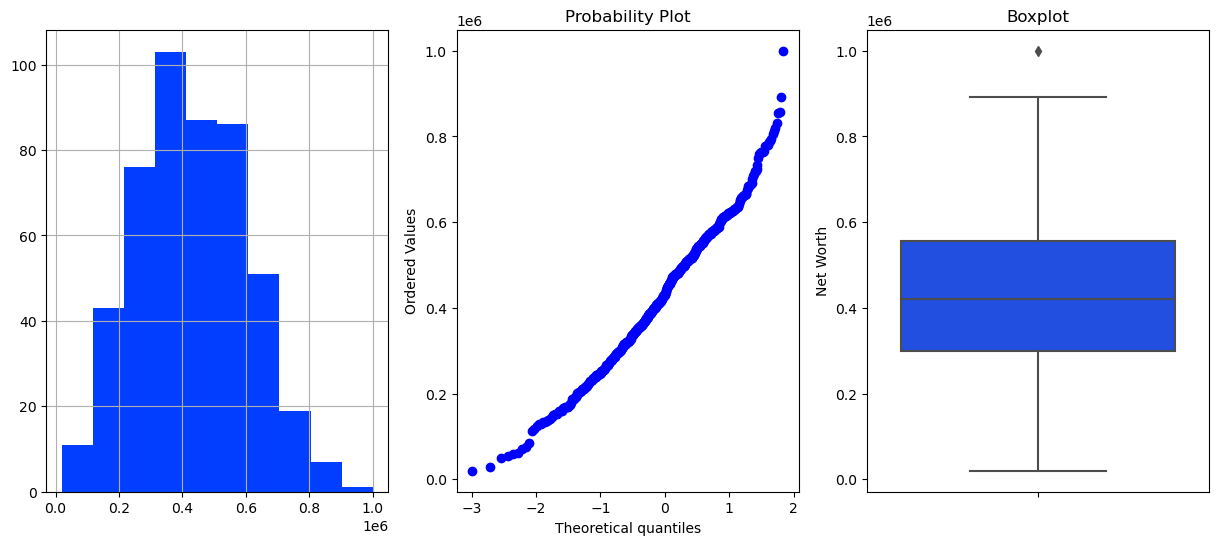

In [69]:
diagnostic_plots(data, 'Net Worth')

(0.0, 83550.0)

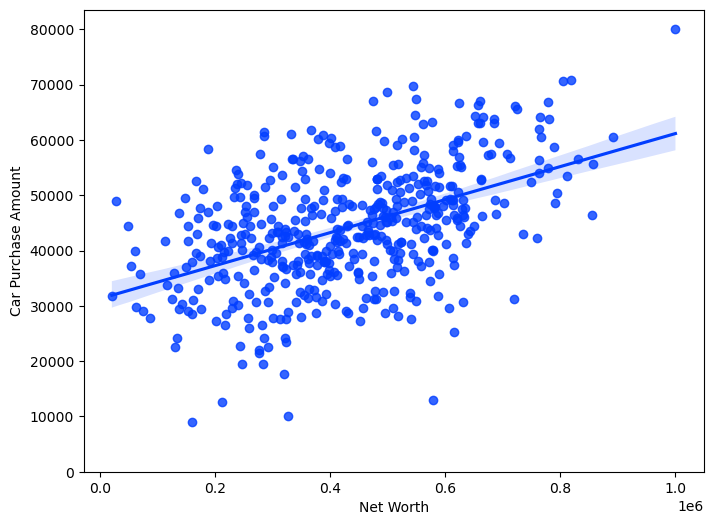

In [70]:
plt.figure(figsize=(8, 6))
sns.regplot(x='Net Worth', y='Car Purchase Amount', data=data)
plt.ylim(0,)

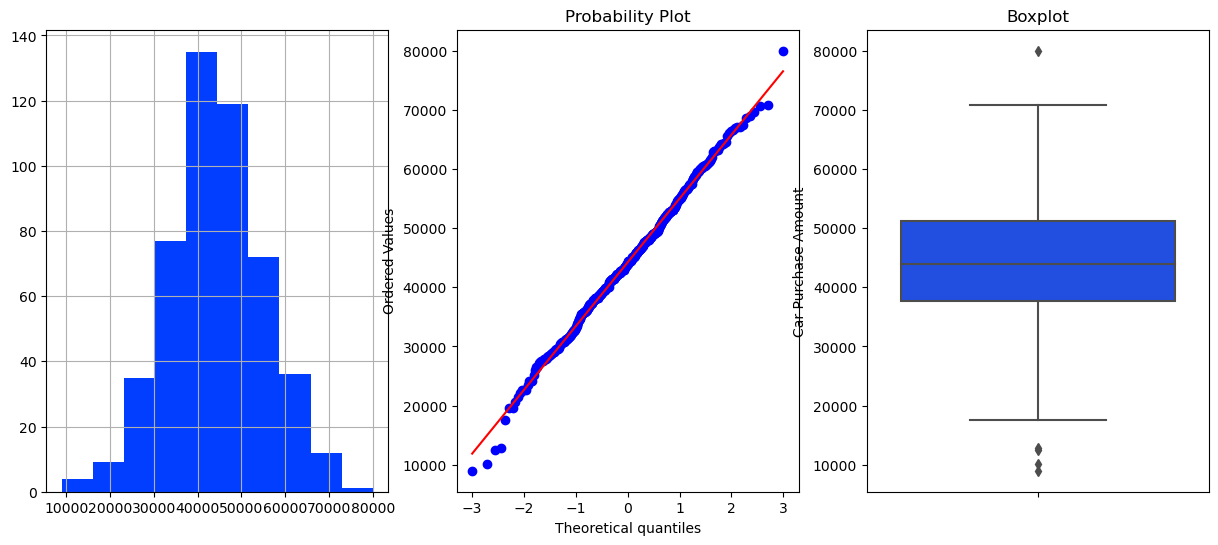

In [71]:
diagnostic_plots(data, 'Car Purchase Amount')

<AxesSubplot:xlabel='miss_ratio'>

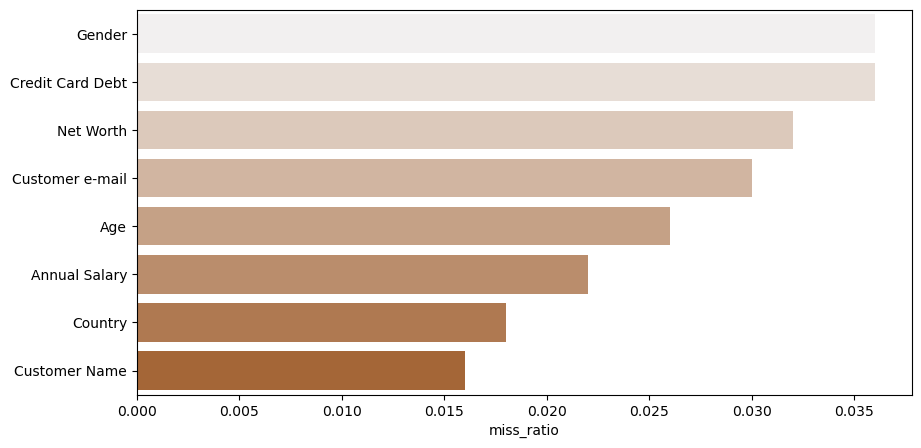

In [72]:
# missing data
palette = sns.light_palette("xkcd:copper", 8)
plt.figure(figsize= (10,5))
plt.xticks()
col_na = data.loc[:, data.isna().any()]
mis_ratio = pd.DataFrame((col_na.isna().sum()/col_na.shape[0]).sort_values(ascending = False),
                        columns = ['miss_ratio'])
sns.barplot(mis_ratio.miss_ratio, mis_ratio.index, palette = palette)

# Step 5: Data Engineering

## 	I. Imputing method (SimpleImputer, KNNImputer, MeanMedianImputer)

In [73]:
data.head()

Customer Name                                    Customer e-mail  \
0    Martina Avila  cubilia.Curae.Phasellus@quisaccumsanconvallis.edu   
1    Harlan Barnes                                eu.dolor@diam.co.uk   
2  Naomi Rodriquez  vulputate.mauris.sagittis@ametconsectetueradip...   
3  Jade Cunningham                            malesuada@dignissim.com   
4     Cedric Leach     felis.ullamcorper.viverra@egetmollislectus.net   

        Country  Gender        Age  Annual Salary  Credit Card Debt  \
0      Bulgaria     0.0  41.851720    62812.09301      11609.380910   
1        Belize     0.0  40.870623    66646.89292       9572.957136   
2       Algeria     1.0  43.152897    53798.55112      11160.355060   
3  Cook Islands     1.0  58.271369    79370.03798      14426.164850   
4        Brazil     1.0        NaN    59729.15130               NaN   

     Net Worth  Car Purchase Amount  
0  238961.2505          35321.45877  
1  530973.9078          45115.52566  
2  638467.1773          42925.70921  
3  548599.0524          67422.36313  
4  560304.0671          55915.46248

In [74]:
data.drop(['Customer Name', 'Customer e-mail','Country'], axis = 1, inplace = True)

In [75]:
data.head()

Gender        Age  Annual Salary  Credit Card Debt    Net Worth  \
0     0.0  41.851720    62812.09301      11609.380910  238961.2505   
1     0.0  40.870623    66646.89292       9572.957136  530973.9078   
2     1.0  43.152897    53798.55112      11160.355060  638467.1773   
3     1.0  58.271369    79370.03798      14426.164850  548599.0524   
4     1.0        NaN    59729.15130               NaN  560304.0671   

   Car Purchase Amount  
0          35321.45877  
1          45115.52566  
2          42925.70921  
3          67422.36313  
4          55915.46248

In [76]:
#SimpleImputer             (Mean, Median, Most_frequent, constant)
#KNNImputer                (KNNImputer)
#MeanMedianImputer         (Mean, Median)

tmp = data.copy()

tmp.isnull().mean()

SI_most_frequent = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')
tmp['Gender_SI_most_frequent'] = SI_most_frequent.fit_transform(tmp['Gender'].values.reshape(-1, 1) )
tmp['Age_SI_most_frequent'] = SI_most_frequent.fit_transform(tmp['Age'].values.reshape(-1, 1) )
tmp['Annual Salary_SI_most_frequent'] = SI_most_frequent.fit_transform(tmp['Annual Salary'].values.reshape(-1, 1) )
tmp['Credit Card Debt_SI_most_frequent'] = SI_most_frequent.fit_transform(tmp['Credit Card Debt'].values.reshape(-1, 1) )
tmp['Net Worth_SI_most_frequent'] = SI_most_frequent.fit_transform(tmp['Net Worth'].values.reshape(-1, 1) )

SI_constant = SimpleImputer(missing_values = np.nan, strategy = 'constant')
tmp['Gender_SI_constant'] = SI_constant.fit_transform(tmp['Gender'].values.reshape(-1, 1) )
tmp['Age_SI_constant'] = SI_constant.fit_transform(tmp['Age'].values.reshape(-1, 1) )
tmp['Annual Salary_SI_constant'] = SI_constant.fit_transform(tmp['Annual Salary'].values.reshape(-1, 1) )
tmp['Credit Card Debt_SI_constant'] = SI_constant.fit_transform(tmp['Credit Card Debt'].values.reshape(-1, 1) )
tmp['Net Worth_SI_constant'] = SI_constant.fit_transform(tmp['Net Worth'].values.reshape(-1, 1) )

SI_mean = SimpleImputer(missing_values = np.nan, strategy = 'mean')
tmp['Gender_SI_mean'] = SI_mean.fit_transform(tmp['Gender'].values.reshape(-1, 1) )
tmp['Age_SI_mean'] = SI_mean.fit_transform(tmp['Age'].values.reshape(-1, 1) )
tmp['Annual Salary_SI_mean'] = SI_mean.fit_transform(tmp['Annual Salary'].values.reshape(-1, 1) )
tmp['Credit Card Debt_SI_mean'] = SI_mean.fit_transform(tmp['Credit Card Debt'].values.reshape(-1, 1) )
tmp['Net Worth_SI_mean'] = SI_mean.fit_transform(tmp['Net Worth'].values.reshape(-1, 1) )

SI_median = SimpleImputer(missing_values = np.nan, strategy = 'median')
tmp['Gender_SI_median'] = SI_median.fit_transform(tmp['Gender'].values.reshape(-1, 1) )
tmp['Age_SI_median'] = SI_median.fit_transform(tmp['Age'].values.reshape(-1, 1) )
tmp['Annual Salary_SI_median'] = SI_median.fit_transform(tmp['Annual Salary'].values.reshape(-1, 1) )
tmp['Credit Card Debt_SI_median'] = SI_median.fit_transform(tmp['Credit Card Debt'].values.reshape(-1, 1) )
tmp['Net Worth_SI_median'] = SI_median.fit_transform(tmp['Net Worth'].values.reshape(-1, 1) )

KNN = KNNImputer(n_neighbors = 5)
tmp['Gender_KNN'] = KNN.fit_transform(tmp['Gender'].values.reshape(-1, 1) )
tmp['Age_KNN'] = KNN.fit_transform(tmp['Age'].values.reshape(-1, 1) )
tmp['Annual Salary_KNN'] = KNN.fit_transform(tmp['Annual Salary'].values.reshape(-1, 1) )
tmp['Credit Card Debt_KNN'] = KNN.fit_transform(tmp['Credit Card Debt'].values.reshape(-1, 1) )
tmp['Net Worth_KNN'] = KNN.fit_transform(tmp['Net Worth'].values.reshape(-1, 1) )

MM_median = MeanMedianImputer(imputation_method = 'median')
tmp['Gender_MM_median'] = MM_median.fit_transform(tmp['Gender'].values.reshape(-1, 1) )
tmp['Age_MM_median'] = MM_median.fit_transform(tmp['Age'].values.reshape(-1, 1) )
tmp['Annual Salary_MM_median'] = MM_median.fit_transform(tmp['Annual Salary'].values.reshape(-1, 1) )
tmp['Credit Card Debt_MM_median'] = MM_median.fit_transform(tmp['Credit Card Debt'].values.reshape(-1, 1) )
tmp['Net Worth_MM_median'] = MM_median.fit_transform(tmp['Net Worth'].values.reshape(-1, 1) )

MM_mean = MeanMedianImputer(imputation_method = 'mean')
tmp['Gender_MM_mean'] = MM_mean.fit_transform(tmp['Gender'].values.reshape(-1, 1) )
tmp['Age_MM_mean'] = MM_mean.fit_transform(tmp['Age'].values.reshape(-1, 1) )
tmp['Annual Salary_MM_mean'] = MM_mean.fit_transform(tmp['Annual Salary'].values.reshape(-1, 1) )
tmp['Credit Card Debt_MM_mean'] = MM_mean.fit_transform(tmp['Credit Card Debt'].values.reshape(-1, 1) )
tmp['Net Worth_MM_mean'] = MM_mean.fit_transform(tmp['Net Worth'].values.reshape(-1, 1) )

tmp.head(10)

Gender        Age  Annual Salary  Credit Card Debt    Net Worth  \
0     0.0  41.851720    62812.09301      11609.380910  238961.2505   
1     0.0  40.870623    66646.89292       9572.957136  530973.9078   
2     1.0  43.152897    53798.55112      11160.355060  638467.1773   
3     1.0  58.271369    79370.03798      14426.164850  548599.0524   
4     1.0        NaN    59729.15130               NaN  560304.0671   
5     1.0  56.824893    68499.85162      14179.472440  428485.3604   
6     1.0  46.607315    39814.52200       5958.460188  326373.1812   
7     1.0  50.193016    51752.23445      10985.696560  629312.4041   
8     0.0  46.584745    58139.25910       3440.823799          NaN   
9     1.0  43.323782    53457.10132      12884.078680  476643.3544   

   Car Purchase Amount  Gender_SI_most_frequent  Age_SI_most_frequent  \
0          35321.45877                      0.0             41.851720   
1          45115.52566                      0.0             40.870623   
2          42925.70921                      1.0             43.152897   
3          67422.36313                      1.0             58.271369   
4          55915.46248                      1.0             20.000000   
5          56611.99784                      1.0             56.824893   
6          28925.70549                      1.0             46.607315   
7          47434.98265                      1.0             50.193016   
8          48013.61410                      0.0             46.584745   
9          38189.50601                      1.0             43.323782   

   Annual Salary_SI_most_frequent  Credit Card Debt_SI_most_frequent  ...  \
0                     62812.09301                       11609.380910  ...   
1                     66646.89292                        9572.957136  ...   
2                     53798.55112                       11160.355060  ...   
3                     79370.03798                       14426.164850  ...   
4                     59729.15130                         100.000000  ...   
5                     68499.85162                       14179.472440  ...   
6                     39814.52200                        5958.460188  ...   
7                     51752.23445                       10985.696560  ...   
8                     58139.25910                        3440.823799  ...   
9                     53457.10132                       12884.078680  ...   

   Gender_MM_median  Age_MM_median  Annual Salary_MM_median  \
0               0.0      41.851720              62812.09301   
1               0.0      40.870623              66646.89292   
2               1.0      43.152897              53798.55112   
3               1.0      58.271369              79370.03798   
4               1.0      45.768823              59729.15130   
5               1.0      56.824893              68499.85162   
6               1.0      46.607315              39814.52200   
7               1.0      50.193016              51752.23445   
8               0.0      46.584745              58139.25910   
9               1.0      43.323782              53457.10132   

   Credit Card Debt_MM_median  Net Worth_MM_median  Gender_MM_mean  \
0                11609.380910          238961.2505             0.0   
1                 9572.957136          530973.9078             0.0   
2                11160.355060          638467.1773             1.0   
3                14426.164850          548599.0524             1.0   
4                 9670.271017          560304.0671             1.0   
5                14179.472440          428485.3604             1.0   
6                 5958.460188          326373.1812             1.0   
7                10985.696560          629312.4041             1.0   
8                 3440.823799          421605.4112             0.0   
9                12884.078680          476643.3544             1.0   

   Age_MM_mean  Annual Salary_MM_mean  Credit Card Debt_MM_mean  \
0    41.851720            62812.09301           

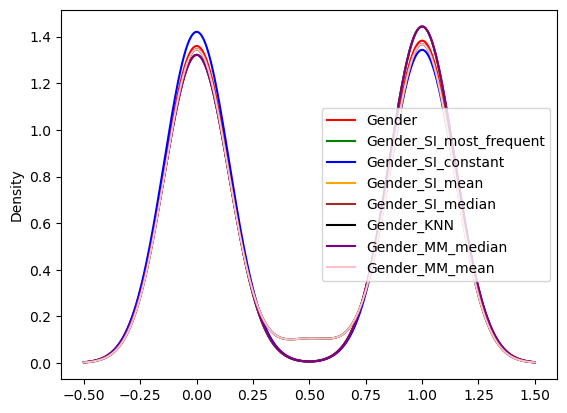

In [77]:
fig = plt.figure()
ax = fig.add_subplot(111)
tmp['Gender'].plot(kind = 'kde', ax = ax, color = 'red')
tmp['Gender_SI_most_frequent'].plot(kind = 'kde', ax = ax, color = 'green')
tmp['Gender_SI_constant'].plot(kind = 'kde', ax = ax, color = 'blue')
tmp['Gender_SI_mean'].plot(kind = 'kde', ax = ax, color = 'orange')
tmp['Gender_SI_median'].plot(kind = 'kde', ax = ax, color = 'brown')
tmp['Gender_KNN'].plot(kind = 'kde', ax = ax, color = 'black')
tmp['Gender_MM_median'].plot(kind = 'kde', ax = ax, color = 'purple')
tmp['Gender_MM_mean'].plot(kind = 'kde', ax = ax, color = 'pink')

lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc = 'best')

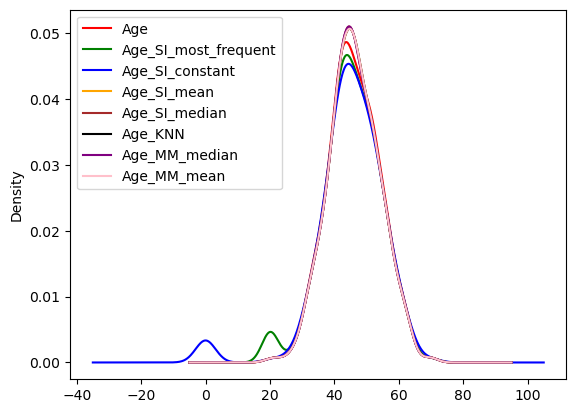

In [78]:
fig = plt.figure()
ax = fig.add_subplot(111)
tmp['Age'].plot(kind = 'kde', ax = ax, color = 'red')
tmp['Age_SI_most_frequent'].plot(kind = 'kde', ax = ax, color = 'green')
tmp['Age_SI_constant'].plot(kind = 'kde', ax = ax, color = 'blue')
tmp['Age_SI_mean'].plot(kind = 'kde', ax = ax, color = 'orange')
tmp['Age_SI_median'].plot(kind = 'kde', ax = ax, color = 'brown')
tmp['Age_KNN'].plot(kind = 'kde', ax = ax, color = 'black')
tmp['Age_MM_median'].plot(kind = 'kde', ax = ax, color = 'purple')
tmp['Age_MM_mean'].plot(kind = 'kde', ax = ax, color = 'pink')

lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc = 'best')

<AxesSubplot:>

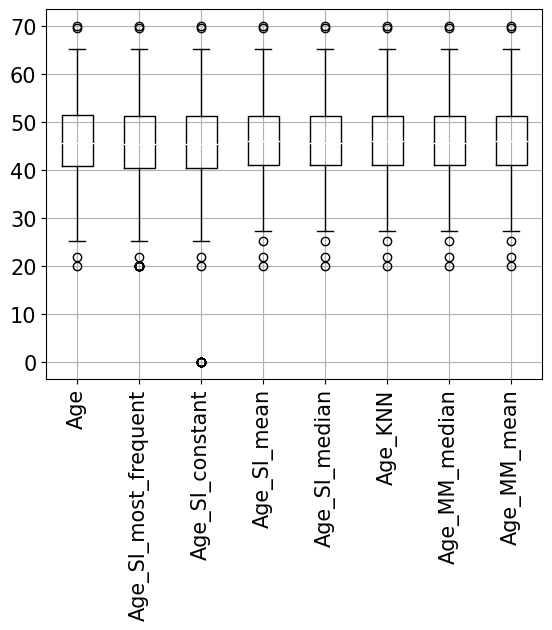

In [79]:
tmp[['Age', 'Age_SI_most_frequent', 'Age_SI_constant', 'Age_SI_mean', 'Age_SI_median', 'Age_KNN', 'Age_MM_median', 'Age_MM_mean']].boxplot(rot=90, fontsize=15)

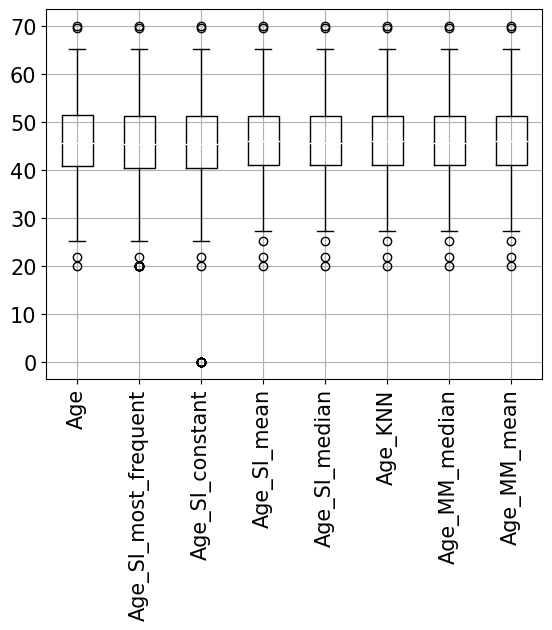

In [80]:
tmp[['Age', 'Age_SI_most_frequent', 'Age_SI_constant', 'Age_SI_mean', 'Age_SI_median', 'Age_KNN', 'Age_MM_median', 'Age_MM_mean']].boxplot(rot=90, fontsize=15)

plt.savefig('Age.png', bbox_inches = 'tight')

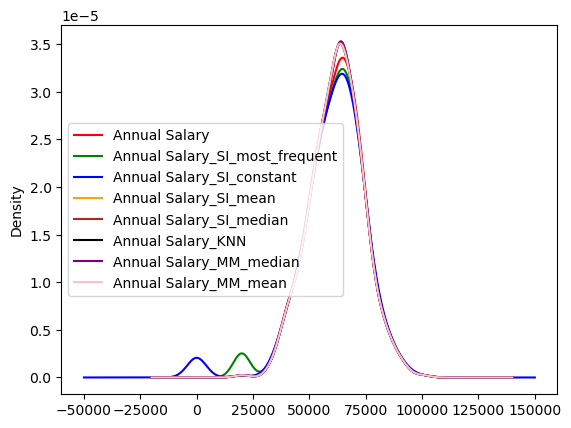

In [81]:
fig = plt.figure()
ax = fig.add_subplot(111)
tmp['Annual Salary'].plot(kind = 'kde', ax = ax, color = 'red')
tmp['Annual Salary_SI_most_frequent'].plot(kind = 'kde', ax = ax, color = 'green')
tmp['Annual Salary_SI_constant'].plot(kind = 'kde', ax = ax, color = 'blue')
tmp['Annual Salary_SI_mean'].plot(kind = 'kde', ax = ax, color = 'orange')
tmp['Annual Salary_SI_median'].plot(kind = 'kde', ax = ax, color = 'brown')
tmp['Annual Salary_KNN'].plot(kind = 'kde', ax = ax, color = 'black')
tmp['Annual Salary_MM_median'].plot(kind = 'kde', ax = ax, color = 'purple')
tmp['Annual Salary_MM_mean'].plot(kind = 'kde', ax = ax, color = 'pink')

lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc = 'best')

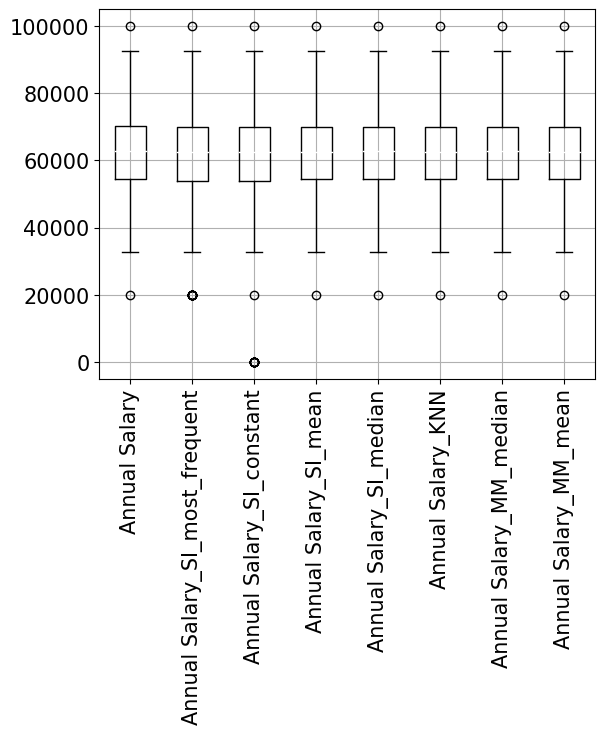

In [82]:
tmp[['Annual Salary', 'Annual Salary_SI_most_frequent', 'Annual Salary_SI_constant', 'Annual Salary_SI_mean', 'Annual Salary_SI_median', 'Annual Salary_KNN', 'Annual Salary_MM_median', 'Annual Salary_MM_mean']].boxplot(rot=90, fontsize=15)

plt.savefig('AS.png', bbox_inches = 'tight')

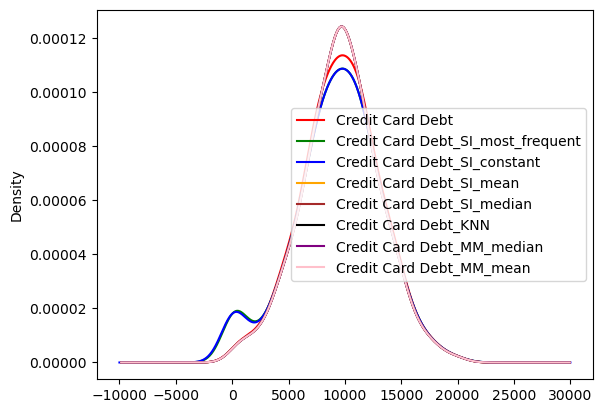

In [83]:
fig = plt.figure()
ax = fig.add_subplot(111)
tmp['Credit Card Debt'].plot(kind = 'kde', ax = ax, color = 'red')
tmp['Credit Card Debt_SI_most_frequent'].plot(kind = 'kde', ax = ax, color = 'green')
tmp['Credit Card Debt_SI_constant'].plot(kind = 'kde', ax = ax, color = 'blue')
tmp['Credit Card Debt_SI_mean'].plot(kind = 'kde', ax = ax, color = 'orange')
tmp['Credit Card Debt_SI_median'].plot(kind = 'kde', ax = ax, color = 'brown')
tmp['Credit Card Debt_KNN'].plot(kind = 'kde', ax = ax, color = 'black')
tmp['Credit Card Debt_MM_median'].plot(kind = 'kde', ax = ax, color = 'purple')
tmp['Credit Card Debt_MM_mean'].plot(kind = 'kde', ax = ax, color = 'pink')

lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc = 'best')

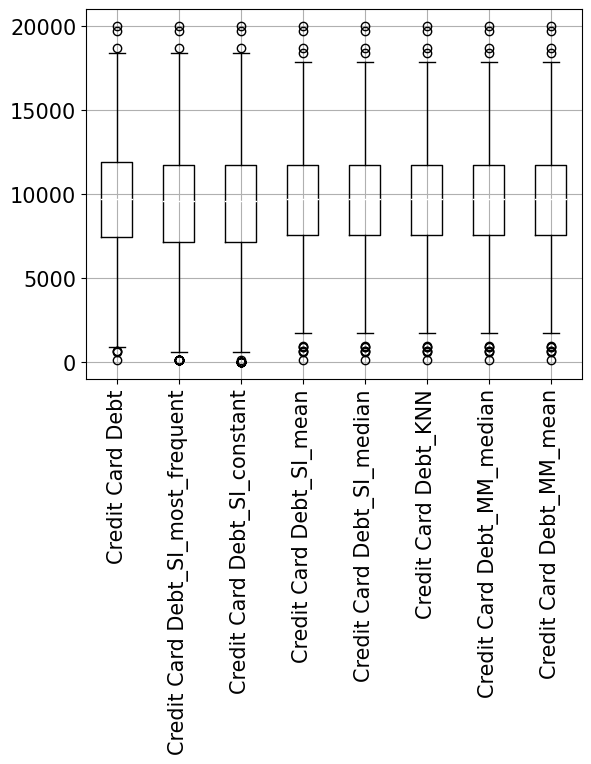

In [84]:
tmp[['Credit Card Debt', 'Credit Card Debt_SI_most_frequent', 'Credit Card Debt_SI_constant', 'Credit Card Debt_SI_mean', 'Credit Card Debt_SI_median', 'Credit Card Debt_KNN', 'Credit Card Debt_MM_median', 'Credit Card Debt_MM_mean']].boxplot(rot=90, fontsize=15)

plt.savefig('CCD.png', bbox_inches = 'tight')

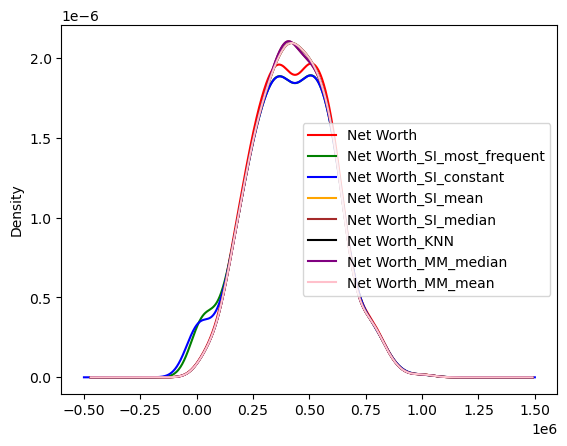

In [85]:
fig = plt.figure()
ax = fig.add_subplot(111)
tmp['Net Worth'].plot(kind = 'kde', ax = ax, color = 'red')
tmp['Net Worth_SI_most_frequent'].plot(kind = 'kde', ax = ax, color = 'green')
tmp['Net Worth_SI_constant'].plot(kind = 'kde', ax = ax, color = 'blue')
tmp['Net Worth_SI_mean'].plot(kind = 'kde', ax = ax, color = 'orange')
tmp['Net Worth_SI_median'].plot(kind = 'kde', ax = ax, color = 'brown')
tmp['Net Worth_KNN'].plot(kind = 'kde', ax = ax, color = 'black')
tmp['Net Worth_MM_median'].plot(kind = 'kde', ax = ax, color = 'purple')
tmp['Net Worth_MM_mean'].plot(kind = 'kde', ax = ax, color = 'pink')

lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc = 'best')

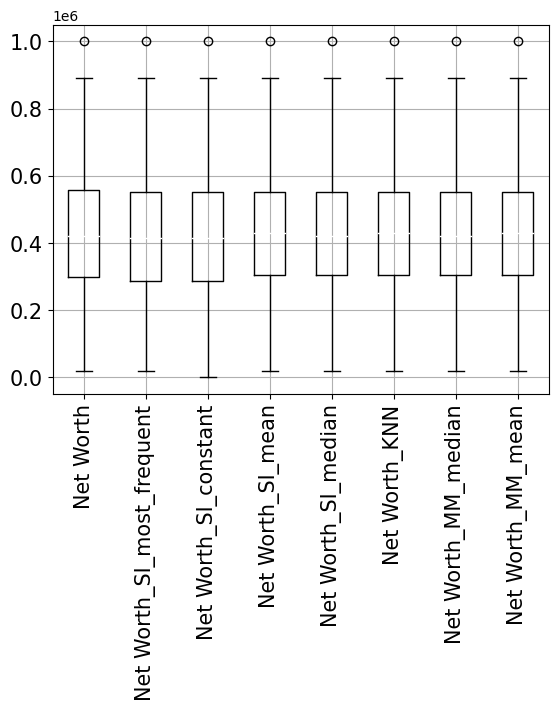

In [86]:
tmp[['Net Worth', 'Net Worth_SI_most_frequent', 'Net Worth_SI_constant', 'Net Worth_SI_mean', 'Net Worth_SI_median', 'Net Worth_KNN', 'Net Worth_MM_median', 'Net Worth_MM_mean']].boxplot(rot=90, fontsize=15)


plt.savefig('NWb.png', bbox_inches = 'tight')

## 	II. Scaling Method (Standard Scaler, Robust  Scaler, MinMax Scaler)
## StandardScaler

In [87]:
col_names = data.columns
features = data[col_names]

scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
scaled_features = pd.DataFrame(features, columns = col_names)
scaled_features.head()


Gender       Age  Annual Salary  Credit Card Debt  Net Worth  \
0 -1.008333 -0.537314       0.061295          0.559951  -1.105321   
1 -1.008333 -0.660824       0.389097         -0.026649   0.585894   
2  0.991735 -0.373508      -0.709189          0.430607   1.208450   
3  0.991735  1.529760       1.476682          1.371336   0.687972   
4  0.991735       NaN      -0.202237               NaN   0.755762   

   Car Purchase Amount  
0            -0.825870  
1             0.084157  
2            -0.119313  
3             2.156820  
4             1.087644

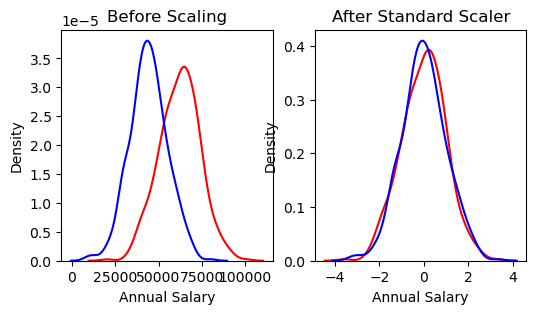

In [88]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(6, 3))

ax1.set_title('Before Scaling')
sns.kdeplot(data['Annual Salary'], ax=ax1, color ='red')
sns.kdeplot(data['Car Purchase Amount'], ax=ax1, color ='blue' )

ax2.set_title('After Standard Scaler')
sns.kdeplot(scaled_features['Annual Salary'], ax=ax2, color ='red')
sns.kdeplot(scaled_features['Car Purchase Amount'], ax=ax2, color ='blue')

plt.show()

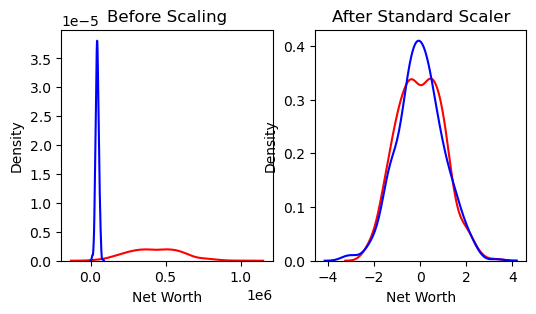

In [89]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(6, 3))

ax1.set_title('Before Scaling')
sns.kdeplot(data['Net Worth'], ax=ax1, color ='red')
sns.kdeplot(data['Car Purchase Amount'], ax=ax1, color ='blue' )

ax2.set_title('After Standard Scaler')
sns.kdeplot(scaled_features['Net Worth'], ax=ax2, color ='red')
sns.kdeplot(scaled_features['Car Purchase Amount'], ax=ax2, color ='blue')

plt.show()

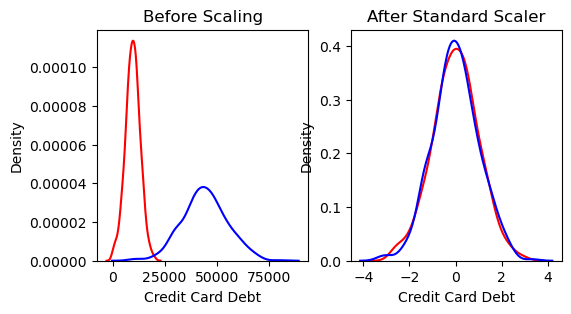

In [90]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(6, 3))

ax1.set_title('Before Scaling')
sns.kdeplot(data['Credit Card Debt'], ax=ax1, color ='red')
sns.kdeplot(data['Car Purchase Amount'], ax=ax1, color ='blue' )

ax2.set_title('After Standard Scaler')
sns.kdeplot(scaled_features['Credit Card Debt'], ax=ax2, color ='red')
sns.kdeplot(scaled_features['Car Purchase Amount'], ax=ax2, color ='blue')

plt.show()

## 	III. RobustScaler

In [91]:
col_names = data.columns
features = data[col_names]

scaler = RobustScaler().fit(features.values)
features = scaler.transform(features.values)
scaled_features = pd.DataFrame(features, columns = col_names)
scaled_features.head()

Gender       Age  Annual Salary  Credit Card Debt  Net Worth  \
0    -1.0 -0.369948       0.000000          0.434696  -0.709426   
1    -1.0 -0.462607       0.243999         -0.021815   0.424809   
2     0.0 -0.247059      -0.573509          0.334037   0.842334   
3     0.0  1.180795       1.053540          1.066143   0.493268   
4     0.0       NaN      -0.196160               NaN   0.538733   

   Car Purchase Amount  
0            -0.636803  
1             0.082037  
2            -0.078685  
3             1.719259  
4             0.874704

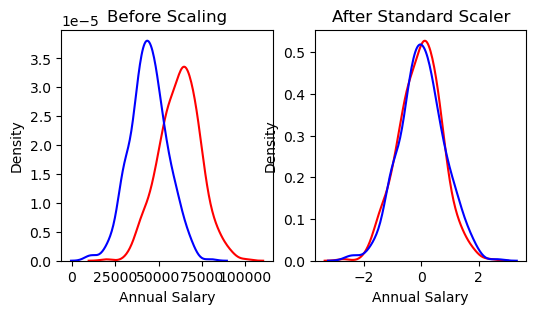

In [92]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(6, 3))

ax1.set_title('Before Scaling')
sns.kdeplot(data['Annual Salary'], ax=ax1, color ='red')
sns.kdeplot(data['Car Purchase Amount'], ax=ax1, color ='blue' )

ax2.set_title('After Standard Scaler')
sns.kdeplot(scaled_features['Annual Salary'], ax=ax2, color ='red')
sns.kdeplot(scaled_features['Car Purchase Amount'], ax=ax2, color ='blue')

plt.show()

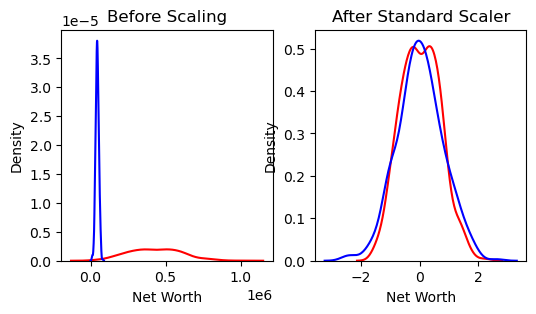

In [93]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(6, 3))

ax1.set_title('Before Scaling')
sns.kdeplot(data['Net Worth'], ax=ax1, color ='red')
sns.kdeplot(data['Car Purchase Amount'], ax=ax1, color ='blue' )

ax2.set_title('After Standard Scaler')
sns.kdeplot(scaled_features['Net Worth'], ax=ax2, color ='red')
sns.kdeplot(scaled_features['Car Purchase Amount'], ax=ax2, color ='blue')

plt.show()

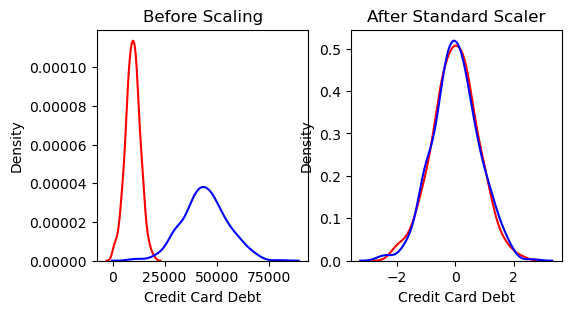

In [94]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(6, 3))

ax1.set_title('Before Scaling')
sns.kdeplot(data['Credit Card Debt'], ax=ax1, color ='red')
sns.kdeplot(data['Car Purchase Amount'], ax=ax1, color ='blue' )

ax2.set_title('After Standard Scaler')
sns.kdeplot(scaled_features['Credit Card Debt'], ax=ax2, color ='red')
sns.kdeplot(scaled_features['Car Purchase Amount'], ax=ax2, color ='blue')

plt.show()

## 	IV. MinMaxScaler

In [95]:
col_names = data.columns
features = data[col_names]

scaler = MinMaxScaler().fit(features.values)
features = scaler.transform(features.values)
scaled_features = pd.DataFrame(features, columns = col_names)
scaled_features.head()

Gender       Age  Annual Salary  Credit Card Debt  Net Worth  \
0     0.0  0.437034       0.535151          0.578361   0.223430   
1     0.0  0.417412       0.583086          0.476028   0.521402   
2     1.0  0.463058       0.422482          0.555797   0.631089   
3     1.0  0.765427       0.742125          0.719908   0.539387   
4     1.0       NaN       0.496614               NaN   0.551331   

   Car Purchase Amount  
0             0.370725  
1             0.508669  
2             0.477827  
3             0.822850  
4             0.660781

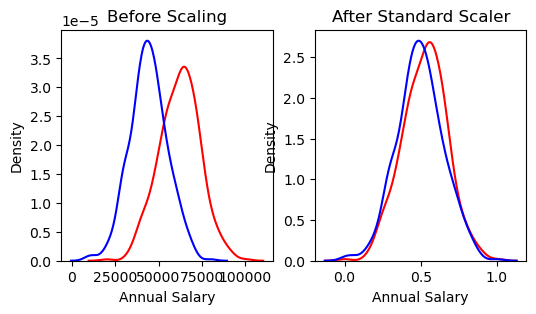

In [96]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(6, 3))

ax1.set_title('Before Scaling')
sns.kdeplot(data['Annual Salary'], ax=ax1, color ='red')
sns.kdeplot(data['Car Purchase Amount'], ax=ax1, color ='blue' )

ax2.set_title('After Standard Scaler')
sns.kdeplot(scaled_features['Annual Salary'], ax=ax2, color ='red')
sns.kdeplot(scaled_features['Car Purchase Amount'], ax=ax2, color ='blue')

plt.show()

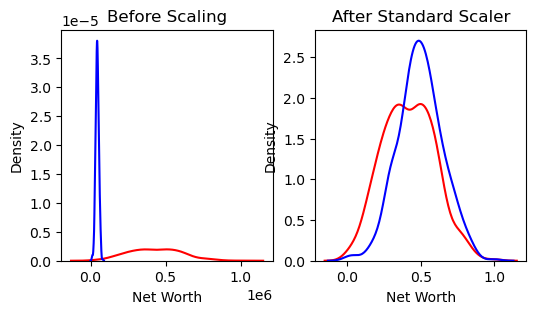

In [97]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(6, 3))

ax1.set_title('Before Scaling')
sns.kdeplot(data['Net Worth'], ax=ax1, color ='red')
sns.kdeplot(data['Car Purchase Amount'], ax=ax1, color ='blue' )

ax2.set_title('After Standard Scaler')
sns.kdeplot(scaled_features['Net Worth'], ax=ax2, color ='red')
sns.kdeplot(scaled_features['Car Purchase Amount'], ax=ax2, color ='blue')

plt.show()

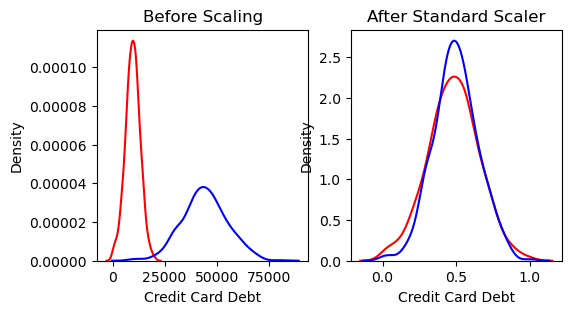

In [98]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(6, 3))

ax1.set_title('Before Scaling')
sns.kdeplot(data['Credit Card Debt'], ax=ax1, color ='red')
sns.kdeplot(data['Car Purchase Amount'], ax=ax1, color ='blue' )

ax2.set_title('After Standard Scaler')
sns.kdeplot(scaled_features['Credit Card Debt'], ax=ax2, color ='red')
sns.kdeplot(scaled_features['Car Purchase Amount'], ax=ax2, color ='blue')

plt.show()

# Discretisation Method 

## KBinsDiscretizer (Uniform, Kmeans)

In [99]:
def impute_na (data, variable): 
    df = data.copy()
    df[variable + "_random"] = df[variable]
    random_sample = tmp_Kbins[variable].dropna().sample(df[variable].isnull().sum(), random_state = 0)
    random_sample.index = df[df[variable].isnull()].index
    df.loc[df[variable].isnull(), variable + "_random"] = random_sample
    return df[variable + "_random"]

In [100]:
tmp_Kbins = data.copy()

In [101]:
tmp_Kbins['Age'] = impute_na(tmp_Kbins, 'Age')

In [102]:
tmp_Kbins.isnull().mean()

Gender                 0.036
Age                    0.000
Annual Salary          0.022
Credit Card Debt       0.036
Net Worth              0.032
Car Purchase Amount    0.000
dtype: float64

In [103]:
disc = KBinsDiscretizer(n_bins = 10, encode = 'ordinal', strategy='uniform')
disc.fit(tmp_Kbins[['Age']])

KBinsDiscretizer(encode='ordinal', n_bins=10, strategy='uniform')

In [104]:
disc.bin_edges_

array([array([20., 25., 30., 35., 40., 45., 50., 55., 60., 65., 70.])],
      dtype=object)

In [105]:
tmp_Kbins = disc.transform(tmp_Kbins[['Age']])
tmp_Kbins = pd.DataFrame(tmp_Kbins, columns = ['Age'])
                         
tmp_Kbins.head(10)

Age
0  4.0
1  4.0
2  4.0
3  7.0
4  4.0
5  7.0
6  5.0
7  6.0
8  5.0
9  4.0

Text(0, 0.5, 'Number of observations per bin')

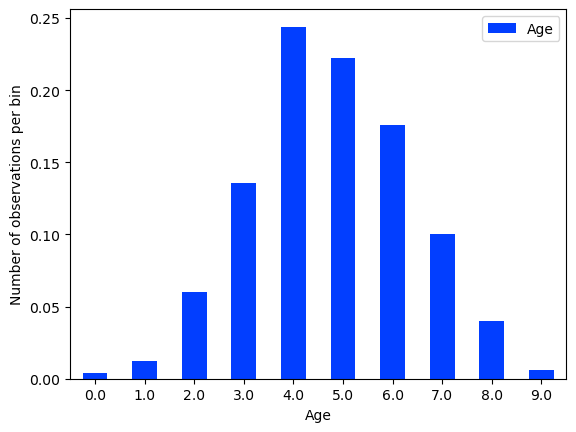

In [106]:
test = tmp_Kbins.groupby(['Age'])['Age'].count()/ len(tmp_Kbins)
tmp = pd.concat([test], axis = 1)
tmp.columns = ['Age']
tmp.plot.bar()
plt.xticks(rotation = 0)
plt.ylabel('Number of observations per bin')

In [107]:
tmp_Kbins = data.copy()

In [108]:
tmp_Kbins['Annual Salary'] = impute_na(tmp_Kbins, 'Annual Salary')

In [109]:
tmp_Kbins.isnull().mean()

Gender                 0.036
Age                    0.026
Annual Salary          0.000
Credit Card Debt       0.036
Net Worth              0.032
Car Purchase Amount    0.000
dtype: float64

In [110]:
disc = KBinsDiscretizer(n_bins = 10, encode = 'ordinal', strategy='uniform')
disc.fit(tmp_Kbins[['Annual Salary']])

KBinsDiscretizer(encode='ordinal', n_bins=10, strategy='uniform')

In [111]:
disc.bin_edges_

array([array([ 20000.,  28000.,  36000.,  44000.,  52000.,  60000.,  68000.,
               76000.,  84000.,  92000., 100000.])                          ],
      dtype=object)

In [112]:
tmp_Kbins = disc.transform(tmp_Kbins[['Annual Salary']])
tmp_Kbins = pd.DataFrame(tmp_Kbins, columns = ['Annual Salary'])
                         
tmp_Kbins.head(10)

Annual Salary
0            5.0
1            5.0
2            4.0
3            7.0
4            4.0
5            6.0
6            2.0
7            3.0
8            4.0
9            4.0

Text(0, 0.5, 'Number of observations per bin')

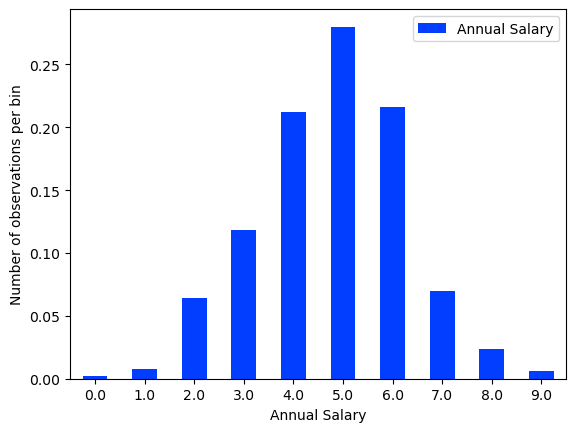

In [113]:
test = tmp_Kbins.groupby(['Annual Salary'])['Annual Salary'].count()/ len(tmp_Kbins)
tmp = pd.concat([test], axis = 1)
tmp.columns = ['Annual Salary']
tmp.plot.bar()
plt.xticks(rotation = 0)
plt.ylabel('Number of observations per bin')

In [114]:
tmp_Kbins = data.copy()

In [115]:
tmp_Kbins['Credit Card Debt'] = impute_na(tmp_Kbins, 'Credit Card Debt')

In [116]:
tmp_Kbins.isnull().mean()

Gender                 0.036
Age                    0.026
Annual Salary          0.022
Credit Card Debt       0.000
Net Worth              0.032
Car Purchase Amount    0.000
dtype: float64

In [117]:
disc = KBinsDiscretizer(n_bins = 10, encode = 'ordinal', strategy='uniform')
disc.fit(tmp_Kbins[['Credit Card Debt']])

KBinsDiscretizer(encode='ordinal', n_bins=10, strategy='uniform')

In [118]:
disc.bin_edges_

array([array([  100.,  2090.,  4080.,  6070.,  8060., 10050., 12040., 14030.,
              16020., 18010., 20000.])                                       ],
      dtype=object)

In [119]:
tmp_Kbins = disc.transform(tmp_Kbins[['Credit Card Debt']])
tmp_Kbins = pd.DataFrame(tmp_Kbins, columns = ['Credit Card Debt'])
                         
tmp_Kbins.head(10)

Credit Card Debt
0               5.0
1               4.0
2               5.0
3               7.0
4               6.0
5               7.0
6               2.0
7               5.0
8               1.0
9               6.0

Text(0, 0.5, 'Number of observations per bin')

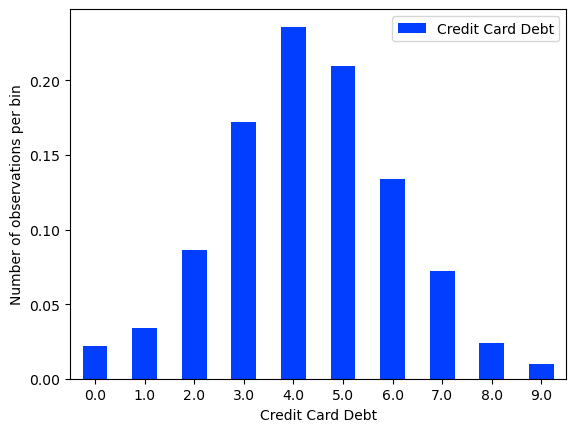

In [120]:
test = tmp_Kbins.groupby(['Credit Card Debt'])['Credit Card Debt'].count()/ len(tmp_Kbins)
tmp = pd.concat([test], axis = 1)
tmp.columns = ['Credit Card Debt']
tmp.plot.bar()
plt.xticks(rotation = 0)
plt.ylabel('Number of observations per bin')

In [121]:
tmp_Kbins = data.copy()

In [122]:
tmp_Kbins['Net Worth'] = impute_na(tmp_Kbins, 'Net Worth')

In [123]:
tmp_Kbins.isnull().mean()

Gender                 0.036
Age                    0.026
Annual Salary          0.022
Credit Card Debt       0.036
Net Worth              0.000
Car Purchase Amount    0.000
dtype: float64

In [124]:
disc = KBinsDiscretizer(n_bins = 10, encode = 'ordinal', strategy='kmeans')
disc.fit(tmp_Kbins[['Net Worth']])

KBinsDiscretizer(encode='ordinal', n_bins=10, strategy='kmeans')

In [125]:
disc.bin_edges_

array([array([  20000.        ,  177772.86723426,  271014.70008131,
               352081.12652069,  440408.26039984,  525485.95543166,
               599772.51860572,  693778.81919991,  790146.95186404,
               914843.04576667, 1000000.        ])                 ],
      dtype=object)

In [126]:
tmp_Kbins = disc.transform(tmp_Kbins[['Net Worth']])
tmp_Kbins = pd.DataFrame(tmp_Kbins, columns = ['Net Worth'])
                         
tmp_Kbins.head(10)

Net Worth
0        1.0
1        5.0
2        6.0
3        5.0
4        5.0
5        3.0
6        2.0
7        6.0
8        3.0
9        4.0

Text(0, 0.5, 'Number of observations per bin')

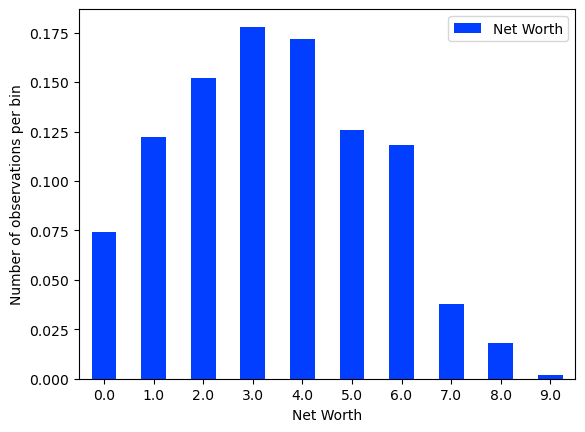

In [127]:
test = tmp_Kbins.groupby(['Net Worth'])['Net Worth'].count()/ len(tmp_Kbins)
tmp = pd.concat([test], axis = 1)
tmp.columns = ['Net Worth']
tmp.plot.bar()
plt.xticks(rotation = 0)
plt.ylabel('Number of observations per bin')

# Step 6: Splitting Dataset

In [128]:
x = data.drop('Car Purchase Amount', axis = 1).values
y = data['Car Purchase Amount'].values

In [129]:
x_train, x_test, y_train, y_test = train_test_split(
    x,
    y, 
    test_size = 0.3, 
    random_state = 0)

In [130]:
x_train.shape, x_test.shape

((350, 5), (150, 5))

In [131]:
x_train

array([[1.00000000e+00, 4.60280759e+01, 4.93987444e+04, 6.99461732e+03,
        1.74525843e+05],
       [1.00000000e+00, 4.10233918e+01, 5.47423946e+04, 1.03426092e+04,
        4.47393488e+05],
       [           nan, 4.76903105e+01, 5.38704848e+04, 1.47205340e+04,
        7.01782528e+05],
       ...,
       [0.00000000e+00, 3.46819613e+01,            nan, 1.27196442e+04,
        2.44310574e+05],
       [0.00000000e+00, 5.11681390e+01, 5.74783792e+04, 2.23009634e+03,
        1.58979710e+05],
       [0.00000000e+00, 4.01423478e+01, 7.11482025e+04, 7.91765097e+03,
        4.16817467e+05]])

In [132]:
x_test

array([[1.00000000e+00, 4.99560144e+01,            nan, 8.24447023e+03,
        1.73079180e+05],
       [0.00000000e+00, 4.52603641e+01, 6.84996945e+04, 1.54367997e+04,
        3.08445860e+05],
       [1.00000000e+00, 4.08753749e+01, 5.90600866e+04, 5.84161204e+03,
        1.36346307e+05],
       [0.00000000e+00, 5.26100454e+01, 7.63188788e+04, 6.39221141e+03,
        2.45216169e+05],
       [1.00000000e+00, 3.85458337e+01, 5.86325888e+04, 1.20353708e+04,
        5.16817317e+05],
       [1.00000000e+00, 5.32897679e+01, 6.46623006e+04, 1.13260343e+04,
        4.81433432e+05],
       [0.00000000e+00, 4.65206418e+01, 7.35021246e+04, 1.11323930e+04,
        7.65711603e+05],
       [0.00000000e+00, 5.48795447e+01, 6.44300740e+04, 6.92410683e+03,
        6.64862010e+05],
       [0.00000000e+00, 5.59896155e+01, 3.94884558e+04, 1.09923338e+04,
        3.63561197e+05],
       [0.00000000e+00, 3.37752693e+01, 5.55768407e+04, 9.39600837e+03,
        4.75126125e+05],
       [1.00000000e+00, 4.8045

In [133]:
x_train = pd.DataFrame(x_train, columns = ['Gender', 'Age', 'Annual Salary', 'Credit Card Debt', 'Net Worth'])
x_test = pd.DataFrame(x_test, columns = ['Gender', 'Age', 'Annual Salary', 'Credit Card Debt', 'Net Worth'])

In [134]:
x_train

Gender        Age  Annual Salary  Credit Card Debt    Net Worth
0       1.0  46.028076    49398.74439       6994.617316  174525.8426
1       1.0  41.023392    54742.39460      10342.609170  447393.4883
2       NaN  47.690311    53870.48483      14720.533990  701782.5280
3       0.0  42.900187    77665.17195      13308.879320  349588.5608
4       1.0  52.864268    65809.10782       4820.839445  692401.4668
..      ...        ...            ...               ...          ...
345     0.0  33.811252    49607.23466       9344.323770  290711.8670
346     0.0  38.551020    69248.49530       6445.784981  298246.0609
347     0.0  34.681961            NaN      12719.644150  244310.5736
348     0.0  51.168139    57478.37922       2230.096344  158979.7102
349     0.0  40.142348    71148.20248       7917.650970  416817.4673

[350 rows x 5 columns]

In [135]:
x_test

Gender        Age  Annual Salary  Credit Card Debt    Net Worth
0       1.0  49.956014            NaN       8244.470226  173079.1798
1       0.0  45.260364    68499.69447      15436.799680  308445.8598
2       1.0  40.875375    59060.08664       5841.612044  136346.3069
3       0.0  52.610045    76318.87883       6392.211408  245216.1691
4       1.0  38.545834    58632.58875      12035.370790  516817.3173
..      ...        ...            ...               ...          ...
145     1.0        NaN    59729.15130               NaN  560304.0671
146     NaN  39.604810    70381.37499       6718.857016  305253.2658
147     1.0  47.470869    66226.72902       8511.814921  356213.0776
148     0.0  44.353617    56437.30404      10461.982760  249182.7848
149     1.0  56.824893    68499.85162      14179.472440  428485.3604

[150 rows x 5 columns]

# Step 7: Building & Training Models

In [136]:
algorithms_model_list = []    

mae_score_list = []
mse_score_list = []
r2_score_list = []

In [137]:
num_var = ['Gender', 'Age', 'Annual Salary', 'Credit Card Debt', 'Net Worth']
num_cont = ['Age', 'Annual Salary', 'Credit Card Debt', 'Net Worth']

## I. Random Forest Regressor

In [138]:
pipe_RandomForestReg = Pipeline([('imputer', MeanMedianImputer(imputation_method = 'median', variables = num_var)),
                    ('discretizer', KBinsDiscretizer(n_bins = 10, encode = 'ordinal', strategy='uniform')),
                    
                    ('RFR', RandomForestRegressor(n_estimators = 100, 
                                             criterion = 'squared_error', 
                                             min_weight_fraction_leaf = 0.0, 
                                             min_samples_leaf = 1,
                                             max_depth = None, 
                                             verbose = 0,
                                             random_state = 0))])

In [139]:
RandomForestReg_param_grid = {
    'imputer__imputation_method':['median', 'mean'],
    'discretizer__n_bins':[5, 10],
    'discretizer__encode':['onehot', 'ordinal'],
    'discretizer__strategy':['uniform', 'kmeans'],
    'RFR__n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
    'RFR__criterion': ['squared_error', 'absolute_error'],
    'RFR__max_depth' : [3, 5, 7],
    'RFR__min_samples_leaf': [1, 3, 5, 7],
    'RFR__min_weight_fraction_leaf': [0.0, 0.1, 0.3]
}

In [140]:
RandomForestReg_grid_search = GridSearchCV(estimator = pipe_RandomForestReg, param_grid = RandomForestReg_param_grid, 
                              cv = 5, n_jobs = -1, scoring = 'accuracy')

In [141]:
RandomForestReg_grid_search.fit(x_train, y_train) 

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('imputer',
                                        MeanMedianImputer(variables=['Gender',
                                                                     'Age',
                                                                     'Annual '
                                                                     'Salary',
                                                                     'Credit '
                                                                     'Card '
                                                                     'Debt',
                                                                     'Net '
                                                                     'Worth'])),
                                       ('discretizer',
                                        KBinsDiscretizer(encode='ordinal',
                                                         n_bins=10,
                             

In [142]:
RandomForestReg_grid_search.best_params_

{'RFR__criterion': 'squared_error',
 'RFR__max_depth': 3,
 'RFR__min_samples_leaf': 1,
 'RFR__min_weight_fraction_leaf': 0.0,
 'RFR__n_estimators': 10,
 'discretizer__encode': 'onehot',
 'discretizer__n_bins': 5,
 'discretizer__strategy': 'uniform',
 'imputer__imputation_method': 'median'}

In [143]:
RandomForestReg_y_pred_train = RandomForestReg_grid_search.predict(x_train)
RandomForestReg_y_pred_test  = RandomForestReg_grid_search.predict(x_test)

In [144]:
print ('train mse:  {}'.format(mean_absolute_error(y_train, RandomForestReg_y_pred_train)))
print ('train rmse: {}'.format(mean_squared_error(y_train, RandomForestReg_y_pred_train)))
print ('train r2:   {}'.format(r2_score(y_train, RandomForestReg_y_pred_train)))  
print ()      
        
print ('test mse:  {}'.format(mean_absolute_error(y_test, RandomForestReg_y_pred_test)))
print ('test rmse: {}'.format(mean_squared_error(y_test, RandomForestReg_y_pred_test)))
print ('test r2:   {}'.format(r2_score(y_test, RandomForestReg_y_pred_test))) 

train mse:  5075.480132750794
train rmse: 42578294.11384401
train r2:   0.6383966645135726

test mse:  6290.812176432834
test rmse: 65528615.06108584
test r2:   0.4102303051564308


In [145]:
algorithms_model_list.append('Random Forest Regressor Train')
mae_score_list.append(mean_absolute_error(y_train, RandomForestReg_y_pred_train))
mse_score_list.append(mean_squared_error(y_train, RandomForestReg_y_pred_train))
r2_score_list.append(r2_score(y_train, RandomForestReg_y_pred_train))

In [146]:
algorithms_model_list.append('Random Forest Regressor Test')
mae_score_list.append(mean_absolute_error(y_test, RandomForestReg_y_pred_test))
mse_score_list.append(mean_squared_error(y_test, RandomForestReg_y_pred_test))
r2_score_list.append(r2_score(y_test, RandomForestReg_y_pred_test))

 ## 	II. K-Nearest Neighbor Regression

In [147]:
pipe_KNN =Pipeline([('imputer', MeanMedianImputer(imputation_method = 'mean')),
                    ('discretizer', KBinsDiscretizer(n_bins = 10, encode = 'ordinal', strategy='uniform')),
                    ('scaler', StandardScaler()),
                    ('KNN', KNeighborsRegressor(n_neighbors = 3,
                                                metric = 'euclidean',
                                                p = 1))
               ])

In [148]:
KNN_param_grid = {
    'imputer__imputation_method':['median', 'mean'],
    'discretizer__n_bins':[5, 10],
    'discretizer__encode':['onehot', 'onehot-dense', 'ordinal'],
    'discretizer__strategy':['uniform', 'quantile', 'kmeans'],
    'KNN__n_neighbors': [3, 5, 7, 9],
    'KNN__metric': ['euclidean', 'manhattan', 'chebyshev', 'minkowski', 'wminkowski', 'seuclidean', 'mahalanobis'],
    'KNN__p': [1, 2, 4, 6]
}

In [149]:
KNN_grid_search = GridSearchCV(estimator = pipe_KNN, param_grid = KNN_param_grid, 
                              cv = 5, n_jobs = -1, scoring = 'r2')

In [150]:
KNN_grid_search.fit(x_train, y_train) 

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('imputer',
                                        MeanMedianImputer(imputation_method='mean')),
                                       ('discretizer',
                                        KBinsDiscretizer(encode='ordinal',
                                                         n_bins=10,
                                                         strategy='uniform')),
                                       ('scaler', StandardScaler()),
                                       ('KNN',
                                        KNeighborsRegressor(metric='euclidean',
                                                            n_neighbors=3,
                                                            p=1))]),
             n_jobs=-1,
             param_grid={'KNN__metric': ['euclidean', 'manhattan', 'chebyshev',
                                         'minkowski', 'wminkowski',
                                         'seuclidean', 

In [151]:
KNN_grid_search.best_params_

{'KNN__metric': 'minkowski',
 'KNN__n_neighbors': 5,
 'KNN__p': 6,
 'discretizer__encode': 'ordinal',
 'discretizer__n_bins': 10,
 'discretizer__strategy': 'quantile',
 'imputer__imputation_method': 'median'}

In [152]:
KNN_y_pred_train = KNN_grid_search.predict(x_train)
KNN_y_pred_test  = KNN_grid_search.predict(x_test)

In [153]:
print ('train mse:  {}'.format(mean_absolute_error(y_train, KNN_y_pred_train)))
print ('train rmse: {}'.format(mean_squared_error(y_train, KNN_y_pred_train)))
print ('train r2:   {}'.format(r2_score(y_train, KNN_y_pred_train)))  
print ()      
        
print ('test mse:  {}'.format(mean_absolute_error(y_test, KNN_y_pred_test)))
print ('test rmse: {}'.format(mean_squared_error(y_test, KNN_y_pred_test)))
print ('test r2:   {}'.format(r2_score(y_test, KNN_y_pred_test))) 

train mse:  2328.6032296171425
train rmse: 9952988.24222657
train r2:   0.9154725706759557

test mse:  3043.2516187066667
test rmse: 18422981.34763793
test r2:   0.834189749357948


In [154]:
algorithms_model_list.append('K-Nearest Neighbor Regression Train')
mae_score_list.append(mean_absolute_error(y_train, KNN_y_pred_train))
mse_score_list.append(mean_squared_error(y_train, KNN_y_pred_train))
r2_score_list.append(r2_score(y_train, KNN_y_pred_train))

In [155]:
algorithms_model_list.append('K-Nearest Neighbor Regression Test')
mae_score_list.append(mean_absolute_error(y_test, KNN_y_pred_test))
mse_score_list.append(mean_squared_error(y_test, KNN_y_pred_test))
r2_score_list.append(r2_score(y_test, KNN_y_pred_test))

## III. Linear Regression

In [156]:
LinearReg_pipe =Pipeline([('imputer', MeanMedianImputer(imputation_method = 'mean')),
                   ('discretizer', KBinsDiscretizer(n_bins = 10, encode = 'ordinal', strategy='uniform')),
                   ('scaler', StandardScaler()),
                   ('LR', LinearRegression(fit_intercept = True))])

In [157]:
LinearReg_param_grid = {
    'imputer__imputation_method':['median', 'mean'],
    'discretizer__n_bins':[5, 10],
    'discretizer__encode':['onehot', 'onehot-dense', 'ordinal'],
    'discretizer__strategy':['uniform', 'quantile', 'kmeans'],
    'LR__fit_intercept': [True, False]}

In [158]:
LinearReg_grid_search = GridSearchCV(estimator = LinearReg_pipe, param_grid = LinearReg_param_grid, 
                              cv = 5, n_jobs = -1, scoring = 'r2')

In [159]:
LinearReg_grid_search.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('imputer',
                                        MeanMedianImputer(imputation_method='mean')),
                                       ('discretizer',
                                        KBinsDiscretizer(encode='ordinal',
                                                         n_bins=10,
                                                         strategy='uniform')),
                                       ('scaler', StandardScaler()),
                                       ('LR', LinearRegression())]),
             n_jobs=-1,
             param_grid={'LR__fit_intercept': [True, False],
                         'discretizer__encode': ['onehot', 'onehot-dense',
                                                 'ordinal'],
                         'discretizer__n_bins': [5, 10],
                         'discretizer__strategy': ['uniform', 'quantile',
                                                   'kmeans'],
               

In [160]:
LinearReg_grid_search.best_params_

{'LR__fit_intercept': True,
 'discretizer__encode': 'ordinal',
 'discretizer__n_bins': 10,
 'discretizer__strategy': 'kmeans',
 'imputer__imputation_method': 'mean'}

In [161]:
LinearReg_y_pred_train = LinearReg_grid_search.predict(x_train)
LinearReg_y_pred_test  = LinearReg_grid_search.predict(x_test)

In [162]:
print ('train mse:  {}'.format(mean_absolute_error(y_train, LinearReg_y_pred_train)))
print ('train rmse: {}'.format(mean_squared_error(y_train, LinearReg_y_pred_train)))
print ('train r2:   {}'.format(r2_score(y_train, LinearReg_y_pred_train)))  
print ()      
        
print ('test mse:  {}'.format(mean_absolute_error(y_test, LinearReg_y_pred_test)))
print ('test rmse: {}'.format(mean_squared_error(y_test, LinearReg_y_pred_test)))
print ('test r2:   {}'.format(r2_score(y_test, LinearReg_y_pred_test))) 

train mse:  1659.347184287053
train rmse: 5014026.472393233
train r2:   0.957417535522046

test mse:  2161.022499500849
test rmse: 11076037.68760471
test r2:   0.9003136055751357


In [163]:
algorithms_model_list.append('Linear Regression Train')
mae_score_list.append(mean_absolute_error(y_train, LinearReg_y_pred_train))
mse_score_list.append(mean_squared_error(y_train, LinearReg_y_pred_train))
r2_score_list.append(r2_score(y_train, LinearReg_y_pred_train))

In [164]:
algorithms_model_list.append('Linear Regression Test')
mae_score_list.append(mean_absolute_error(y_test, LinearReg_y_pred_test))
mse_score_list.append(mean_squared_error(y_test, LinearReg_y_pred_test))
r2_score_list.append(r2_score(y_test, LinearReg_y_pred_test))

## IV. Support Vector Regression

In [165]:
SVR_pipe =Pipeline([('imputer', MeanMedianImputer(imputation_method = 'mean')),
                   ('discretizer', KBinsDiscretizer(n_bins = 10, encode = 'ordinal', strategy='uniform')),
                   ('scaler', StandardScaler()),
                   ('SVR', SVR(kernel = 'linear', degree = 1, C = 150.0, epsilon = 0.1))
               ])

In [166]:
SVR_param_grid = {
    'imputer__imputation_method':['median', 'mean'],
    'discretizer__n_bins':[5, 10],
    'discretizer__encode':['onehot', 'onehot-dense', 'ordinal'],
    'discretizer__strategy':['uniform', 'quantile', 'kmeans'],
    'SVR__kernel': ['linear', 'poly', 'rbf', 'sigmoid', 'precomputed'],
    'SVR__degree': [1, 3, 5, 7],
    'SVR__C': [70.0, 100.0, 130.0, 150.0],
    'SVR__epsilon': [0.1, 0.5, 1.0, 2.0]
}

In [167]:
SVR_grid_search = GridSearchCV(estimator = SVR_pipe, param_grid = SVR_param_grid, 
                              cv = 5, n_jobs = -1, scoring = 'r2')

In [168]:
SVR_grid_search.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('imputer',
                                        MeanMedianImputer(imputation_method='mean')),
                                       ('discretizer',
                                        KBinsDiscretizer(encode='ordinal',
                                                         n_bins=10,
                                                         strategy='uniform')),
                                       ('scaler', StandardScaler()),
                                       ('SVR',
                                        SVR(C=150.0, degree=1,
                                            kernel='linear'))]),
             n_jobs=-1,
             param_grid={'SVR__C': [70.0, 100.0, 130.0, 150.0],
                         'SVR__degree': [1, 3, 5, 7],
                         'SVR__epsilon': [0.1, 0.5, 1.0, 2.0],
                         'SVR__kernel': ['linear', 'poly', 'rbf', 'sigmoid',
                                         

In [169]:
SVR_grid_search.best_params_

{'SVR__C': 150.0,
 'SVR__degree': 1,
 'SVR__epsilon': 2.0,
 'SVR__kernel': 'linear',
 'discretizer__encode': 'ordinal',
 'discretizer__n_bins': 10,
 'discretizer__strategy': 'kmeans',
 'imputer__imputation_method': 'mean'}

In [170]:
SVR_y_pred_train = SVR_grid_search.predict(x_train)
SVR_y_pred_test  = SVR_grid_search.predict(x_test)

In [171]:
print ('train mse:  {}'.format(mean_absolute_error(y_train, SVR_y_pred_train)))
print ('train rmse: {}'.format(mean_squared_error(y_train, SVR_y_pred_train)))
print ('train r2:   {}'.format(r2_score(y_train, SVR_y_pred_train)))  
print ()      
        
print ('test mse:  {}'.format(mean_absolute_error(y_test, SVR_y_pred_test)))
print ('test rmse: {}'.format(mean_squared_error(y_test, SVR_y_pred_test)))
print ('test r2:   {}'.format(r2_score(y_test, SVR_y_pred_test))) 

train mse:  1718.3957797495216
train rmse: 5490166.1223816415
train r2:   0.9533738393341997

test mse:  2166.392792217919
test rmse: 11059244.182386532
test r2:   0.9004647502382519


In [172]:
algorithms_model_list.append('Support Vector Regression Train')
mae_score_list.append(mean_absolute_error(y_train, SVR_y_pred_train))
mse_score_list.append(mean_squared_error(y_train, SVR_y_pred_train))
r2_score_list.append(r2_score(y_train, SVR_y_pred_train))

In [173]:
algorithms_model_list.append('Support Vector Regression Test')
mae_score_list.append(mean_absolute_error(y_test, SVR_y_pred_test))
mse_score_list.append(mean_squared_error(y_test, SVR_y_pred_test))
r2_score_list.append(r2_score(y_test, SVR_y_pred_test))

 ## V. XGBoost Regression

In [174]:
XGB_pipe =Pipeline([('imputer', MeanMedianImputer(imputation_method = 'median')),
                    ('discretizer', KBinsDiscretizer(n_bins = 10, encode = 'ordinal', strategy='uniform')),
                    ('scaler', StandardScaler()),
                    ('XGB', XGBRegressor(n_estimators = 600, 
                                         max_depth = 1, 
                                         max_leaves = 0))])

In [175]:
XGB_param_grid = {
    'imputer__imputation_method':['median', 'mean'],
    'discretizer__n_bins':[5, 10],
    'discretizer__encode':['onehot', 'onehot-dense', 'ordinal'],
    'discretizer__strategy':['uniform', 'quantile', 'kmeans'],
    'XGB__n_estimators': [300, 400, 500, 600],
    'XGB__max_depth': [1, 3, 5, 10],
    'XGB__max_leaves': [0, 1, 5, 10, 20]}

In [176]:
XGB_grid_search = GridSearchCV(estimator = XGB_pipe, param_grid = XGB_param_grid, 
                              cv = 5, n_jobs = -1, scoring = 'r2')

In [177]:
XGB_grid_search.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('imputer', MeanMedianImputer()),
                                       ('discretizer',
                                        KBinsDiscretizer(encode='ordinal',
                                                         n_bins=10,
                                                         strategy='uniform')),
                                       ('scaler', StandardScaler()),
                                       ('XGB',
                                        XGBRegressor(base_score=None,
                                                     booster=None,
                                                     colsample_bylevel=None,
                                                     colsample_bynode=None,
                                                     colsample_bytree=None,
                                                     enable_categorical=False,
                                                     gamma=None, gpu_i

In [178]:
XGB_grid_search.best_params_

{'XGB__max_depth': 1,
 'XGB__max_leaves': 0,
 'XGB__n_estimators': 500,
 'discretizer__encode': 'onehot-dense',
 'discretizer__n_bins': 10,
 'discretizer__strategy': 'kmeans',
 'imputer__imputation_method': 'mean'}

In [179]:
XGB_y_pred_train = XGB_grid_search.predict(x_train)
XGB_y_pred_test  = XGB_grid_search.predict(x_test)

In [180]:
print ('train mse:  {}'.format(mean_absolute_error(y_train, XGB_y_pred_train)))
print ('train rmse: {}'.format(mean_squared_error(y_train, XGB_y_pred_train)))
print ('train r2:   {}'.format(r2_score(y_train, XGB_y_pred_train)))  
print ()      
        
print ('test mse:  {}'.format(mean_absolute_error(y_test, XGB_y_pred_test)))
print ('test rmse: {}'.format(mean_squared_error(y_test, XGB_y_pred_test)))
print ('test r2:   {}'.format(r2_score(y_test, XGB_y_pred_test))) 

train mse:  1520.4276128116073
train rmse: 4426711.764099453
train r2:   0.9624054046210623

test mse:  2194.6212560416666
test rmse: 11274341.715132743
test r2:   0.8985288325306813


In [181]:
algorithms_model_list.append('XG Boost Regression Train')
mae_score_list.append(mean_absolute_error(y_train, XGB_y_pred_train))
mse_score_list.append(mean_squared_error(y_train, XGB_y_pred_train))
r2_score_list.append(r2_score(y_train, XGB_y_pred_train))

In [182]:
algorithms_model_list.append('XG Boost Regression Test')
mae_score_list.append(mean_absolute_error(y_test, XGB_y_pred_test))
mse_score_list.append(mean_squared_error(y_test, XGB_y_pred_test))
r2_score_list.append(r2_score(y_test, XGB_y_pred_test))

## VI. AdaBoost Regressor

In [183]:
AB_pipe =Pipeline([('imputer', MeanMedianImputer(imputation_method = 'mean')),
                    ('discretizer', KBinsDiscretizer(n_bins = 10, encode = 'ordinal', strategy='uniform')),
                    ('scaler', StandardScaler()),
                    ('AB', AdaBoostRegressor(n_estimators= 500,
                                             loss = 'square',
                                             learning_rate = 1.5,
                                             random_state = 3))])

In [184]:
AB_param_grid = {
    'imputer__imputation_method':['median', 'mean'],
    'discretizer__n_bins':[5, 10],
    'discretizer__encode':['onehot', 'onehot-dense', 'ordinal'],
    'discretizer__strategy':['uniform', 'quantile', 'kmeans'],
    'AB__n_estimators': [200, 300, 400, 500],
    'AB__loss': ['linear', 'square', 'exponential'],
    'AB__learning_rate': [1.0, 1.2, 1.3, 1.5]}

In [185]:
AB_grid_search = GridSearchCV(estimator = AB_pipe, param_grid = AB_param_grid, 
                              cv = 5, n_jobs = -1, scoring = 'r2')

In [186]:
AB_grid_search.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('imputer',
                                        MeanMedianImputer(imputation_method='mean')),
                                       ('discretizer',
                                        KBinsDiscretizer(encode='ordinal',
                                                         n_bins=10,
                                                         strategy='uniform')),
                                       ('scaler', StandardScaler()),
                                       ('AB',
                                        AdaBoostRegressor(learning_rate=1.5,
                                                          loss='square',
                                                          n_estimators=500,
                                                          random_state=3))]),
             n_jobs=-1,
             param_grid={'AB__learning_rate': [1.0, 1.2, 1.3, 1.5],
                         'AB__loss': ['linear', 'square'

In [187]:
AB_grid_search.best_params_

{'AB__learning_rate': 1.5,
 'AB__loss': 'square',
 'AB__n_estimators': 300,
 'discretizer__encode': 'ordinal',
 'discretizer__n_bins': 10,
 'discretizer__strategy': 'kmeans',
 'imputer__imputation_method': 'mean'}

In [188]:
AB_y_pred_train = AB_grid_search.predict(x_train)
AB_y_pred_test  = AB_grid_search.predict(x_test)

In [189]:
print ('train mse:  {}'.format(mean_absolute_error(y_train, AB_y_pred_train)))
print ('train rmse: {}'.format(mean_squared_error(y_train, AB_y_pred_train)))
print ('train r2:   {}'.format(r2_score(y_train, AB_y_pred_train)))  
print ()      
        
print ('test mse:  {}'.format(mean_absolute_error(y_test, AB_y_pred_test)))
print ('test rmse: {}'.format(mean_squared_error(y_test, AB_y_pred_test)))
print ('test r2:   {}'.format(r2_score(y_test, AB_y_pred_test))) 

train mse:  2841.1505059426895
train rmse: 12194798.540033158
train r2:   0.8964336190672507

test mse:  3639.5861699107754
test rmse: 24782993.297038626
test r2:   0.7769484616685489


In [190]:
algorithms_model_list.append('Ada Boost Regression Train')
mae_score_list.append(mean_absolute_error(y_train, AB_y_pred_train))
mse_score_list.append(mean_squared_error(y_train, AB_y_pred_train))
r2_score_list.append(r2_score(y_train, AB_y_pred_train))

In [191]:
algorithms_model_list.append('Ada Boost Regression Test')
mae_score_list.append(mean_absolute_error(y_test, AB_y_pred_test))
mse_score_list.append(mean_squared_error(y_test, AB_y_pred_test))
r2_score_list.append(r2_score(y_test, AB_y_pred_test))

## VII. Gradient Boosting Regression

In [192]:
GB_pipe =Pipeline([('imputer', MeanMedianImputer(imputation_method = 'mean')),
                    ('discretizer', KBinsDiscretizer(n_bins = 10, encode = 'ordinal', strategy='uniform')),
                    ('scaler', StandardScaler()),
                    ('GB', GradientBoostingRegressor(loss = 'absolute_error', 
                                                     n_estimators = 300, 
                                                     learning_rate = 0.1,
                                                     random_state = 3))])

In [193]:
GB_param_grid = {
    'imputer__imputation_method':['median', 'mean'],
    'discretizer__n_bins':[5, 10],
    'discretizer__encode':['onehot', 'onehot-dense', 'ordinal'],
    'discretizer__strategy':['uniform', 'quantile', 'kmeans'],
    'GB__n_estimators' : [100, 200, 300],
    'GB__loss':['squared_error', 'absolute_error', 'huber', 'quantile'],
    'GB__learning_rate':[0.1, 0.2, 0.3]}

In [194]:
GB_grid_search = GridSearchCV(estimator = GB_pipe, param_grid = GB_param_grid, 
                              cv = 5, n_jobs = -1, scoring = 'r2')

In [195]:
GB_grid_search.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('imputer',
                                        MeanMedianImputer(imputation_method='mean')),
                                       ('discretizer',
                                        KBinsDiscretizer(encode='ordinal',
                                                         n_bins=10,
                                                         strategy='uniform')),
                                       ('scaler', StandardScaler()),
                                       ('GB',
                                        GradientBoostingRegressor(loss='absolute_error',
                                                                  n_estimators=300,
                                                                  random_state=3))]),
             n_jobs=-1,
             param_grid={'GB__learning_rate': [0.1, 0.2, 0.3],
                         'GB__loss': ['squared_error', 'absolute_error',
                                 

In [196]:
GB_grid_search.best_params_

{'GB__learning_rate': 0.2,
 'GB__loss': 'huber',
 'GB__n_estimators': 100,
 'discretizer__encode': 'ordinal',
 'discretizer__n_bins': 10,
 'discretizer__strategy': 'kmeans',
 'imputer__imputation_method': 'mean'}

In [197]:
GB_y_pred_train = GB_grid_search.predict(x_train)
GB_y_pred_test  = GB_grid_search.predict(x_test)

In [198]:
print ('train mse:  {}'.format(mean_absolute_error(y_train, GB_y_pred_train)))
print ('train rmse: {}'.format(mean_squared_error(y_train, GB_y_pred_train)))
print ('train r2:   {}'.format(r2_score(y_train, GB_y_pred_train)))  
print ()      
        
print ('test mse:  {}'.format(mean_absolute_error(y_test, GB_y_pred_test)))
print ('test rmse: {}'.format(mean_squared_error(y_test, GB_y_pred_test)))
print ('test r2:   {}'.format(r2_score(y_test, GB_y_pred_test))) 

train mse:  1210.8664932003755
train rmse: 3351310.7544226693
train r2:   0.9715384288574223

test mse:  2604.226042804091
test rmse: 13752036.441054996
test r2:   0.8762291202437591


In [199]:
algorithms_model_list.append('Gradient Boosting Regression Train')
mae_score_list.append(mean_absolute_error(y_train, GB_y_pred_train))
mse_score_list.append(mean_squared_error(y_train, GB_y_pred_train))
r2_score_list.append(r2_score(y_train, GB_y_pred_train))

In [200]:
algorithms_model_list.append('Gradient Boosting Regression Test')
mae_score_list.append(mean_absolute_error(y_test, GB_y_pred_test))
mse_score_list.append(mean_squared_error(y_test, GB_y_pred_test))
r2_score_list.append(r2_score(y_test, GB_y_pred_test))

# Step 8: Model Evaluation

In [201]:
model_results = pd.DataFrame({'Model': algorithms_model_list, 
                             'mae_score': mae_score_list,
                             'mse_score': mse_score_list,                           
                             'r2_score': r2_score_list})
model_results

Model    mae_score     mse_score  r2_score
0         Random Forest Regressor Train  5075.480133  4.257829e+07  0.638397
1          Random Forest Regressor Test  6290.812176  6.552862e+07  0.410230
2   K-Nearest Neighbor Regression Train  2328.603230  9.952988e+06  0.915473
3    K-Nearest Neighbor Regression Test  3043.251619  1.842298e+07  0.834190
4               Linear Regression Train  1659.347184  5.014026e+06  0.957418
5                Linear Regression Test  2161.022500  1.107604e+07  0.900314
6       Support Vector Regression Train  1718.395780  5.490166e+06  0.953374
7        Support Vector Regression Test  2166.392792  1.105924e+07  0.900465
8             XG Boost Regression Train  1520.427613  4.426712e+06  0.962405
9              XG Boost Regression Test  2194.621256  1.127434e+07  0.898529
10           Ada Boost Regression Train  2841.150506  1.219480e+07  0.896434
11            Ada Boost Regression Test  3639.586170  2.478299e+07  0.776948
12   Gradient Boosting Regression Train  1210.866493  3.351311e+06  0.971538
13    Gradient Boosting Regression Test  2604.226043  1.375204e+07  0.876229

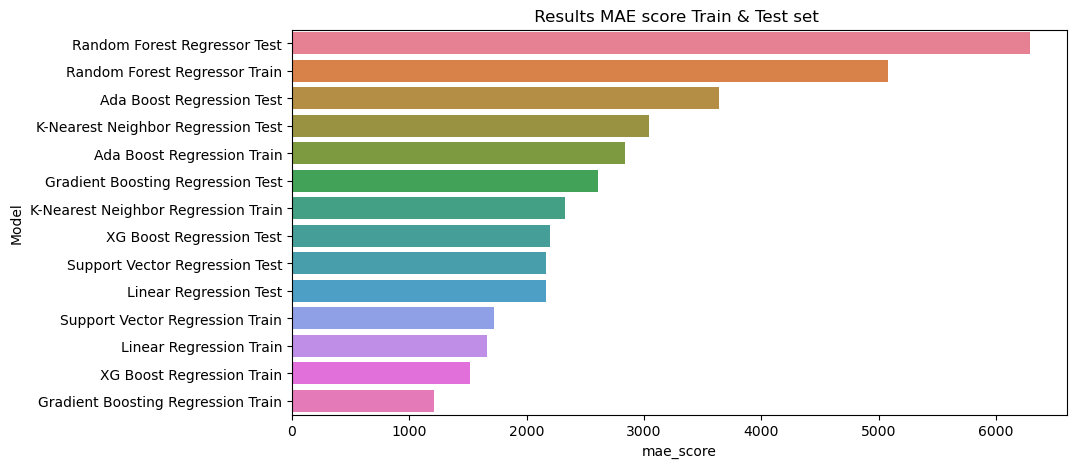

In [202]:
plt.figure(figsize=(10, 5))
sns.barplot(data = model_results.sort_values(by ='mae_score', ascending = False), 
            x = 'mae_score', y = 'Model', palette = "husl" )
plt.title(" Results MAE score Train & Test set  ")
plt.show()

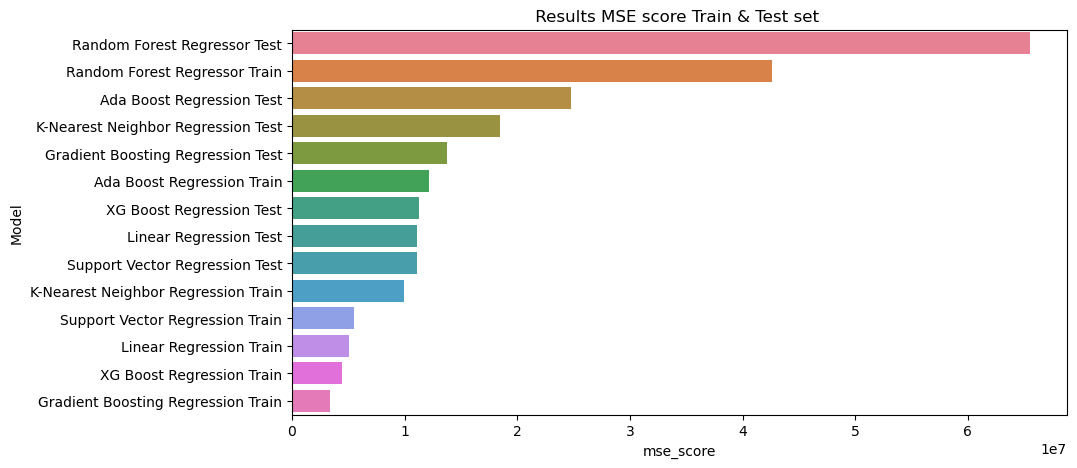

In [203]:
plt.figure(figsize=(10, 5))
sns.barplot(data = model_results.sort_values(by ='mse_score', ascending = False), 
            x = 'mse_score', y = 'Model', palette = "husl" )
plt.title(" Results MSE score Train & Test set  ")
plt.show()

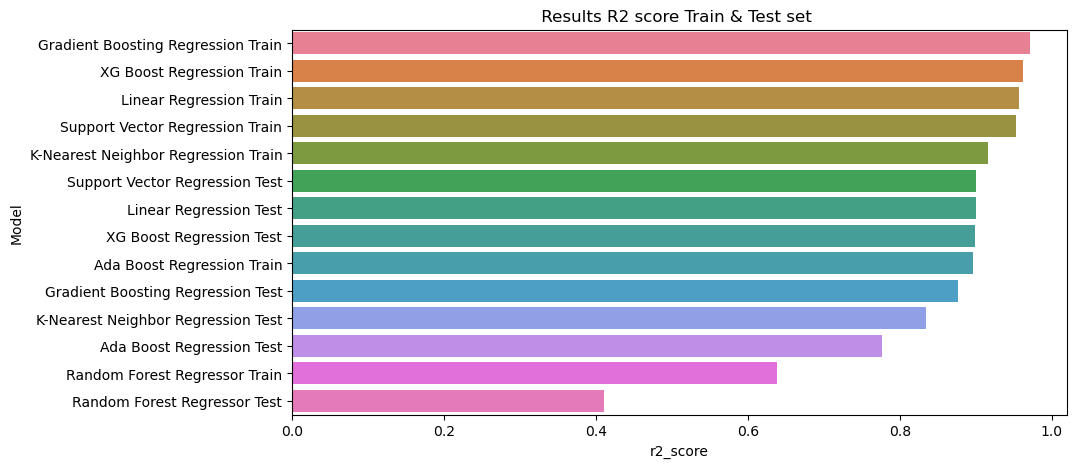

In [204]:
plt.figure(figsize=(10, 5))
sns.barplot(data = model_results.sort_values(by ='r2_score', ascending = False), 
            x = 'r2_score', y = 'Model', palette = "husl" )
plt.title(" Results R2 score Train & Test set  ")
plt.show()

# Step 9: Conclusion

## Study Summary 

I 

Our goal with the machine learning phase was that we wanted to train a model which will predict car purchase amount based on certain factors that include 'Customer Name', 'Customer email', 'Country', 'Gender', 'Age', 'Annual Salary', 'Credit Card Debt' and 'Net Worth'. After the data analysis part we removed redundant variables such as 'Customer Name', 'Customer email and 'Country'. Prior to model training parts we checked how data would change if we use different imputation, scaling and discretization methods.

II 

We trained eight models, one RandomForestRegressor, one KNeighborsRegressor, one LinearRegression, one SVR, one XGBRegressor, one AdaBoostRegressor, one GradientBoostingRegressor and one DecisionTreeRegressor. We also implied Pipeline and used Grid Search to find the best hyperparameters and evaluated results with the following regression metrics such as mean absolute error, mean squared error and  r2 score.

III 

Among ML models that we have built for this study SVR and LinearRegression showed the most stable and accurate results in both trained and test versions whereas RandomForestRegressor performed the worst among other ML models.

IV 

We were somewhat successful in giving a general idea but because of limitations of time and data set we still have a long way to go. Looking forward, we would like to acquire more data for accurate prediction of price so that if someone wants to buy a used car they have an idea of what it would cost them beforehand and not end up paying more than the car’s worth.
